# Probability for Deep Learning: From Zero to Hero


---

## Welcome!

Probability theory is the **mathematical foundation** of deep learning. From training neural networks to understanding model uncertainty, probability is everywhere!

### Why Probability Matters in Deep Learning

| Concept | Deep Learning Application |
|---------|---------------------------|
| **Probability Distributions** | Weight initialization, output predictions |
| **Bayes' Theorem** | Bayesian neural networks, uncertainty estimation |
| **Expected Value** | Loss functions, risk minimization |
| **Entropy** | Cross-entropy loss, information bottleneck |
| **KL Divergence** | VAEs, knowledge distillation, regularization |
| **Maximum Likelihood** | Training objective for most neural networks |
| **Sampling** | Dropout, data augmentation, generative models |

### What You'll Learn

| Part | Topics |
|------|--------|
| **Part 1** | Probability fundamentals: events, axioms, rules |
| **Part 2** | Conditional probability and Bayes' theorem |
| **Part 3** | Random variables and probability distributions |
| **Part 4** | Expected value, variance, and moments |
| **Part 5** | Key distributions in deep learning |
| **Part 6** | Information theory: entropy, KL divergence |
| **Part 7** | Maximum likelihood estimation |
| **Part 8** | Sampling and Monte Carlo methods |
| **Part 9** | Practical exercises |

---

## Setup

In [ ]:
# Install dependencies
!pip install numpy matplotlib seaborn scipy -q

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import factorial, comb
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# For reproducibility
np.random.seed(42)

print("Setup complete!")
print(f"NumPy version: {np.__version__}")

Setup complete!
NumPy version: 2.0.2


---

# Part 1: Probability Fundamentals

## What is Probability?

Probability quantifies **uncertainty**. It tells us how likely an event is to occur.

$$P(A) \in [0, 1]$$

- $P(A) = 0$: Event A is **impossible**
- $P(A) = 1$: Event A is **certain**
- $P(A) = 0.5$: Event A has **equal chance** of occurring or not

---

## 1.1 Sample Space and Events

- **Sample Space ($\Omega$)**: The set of ALL possible outcomes
- **Event ($A$)**: A subset of the sample space (outcomes we care about)

In [ ]:
# ============================================================
# EXAMPLE: Rolling a Die
# ============================================================

print("=" * 60)
print("SAMPLE SPACE AND EVENTS")
print("=" * 60)

# Sample space for a fair die
sample_space = {1, 2, 3, 4, 5, 6}
print(f"\nSample Space Ω = {sample_space}")
print(f"Total outcomes: |Ω| = {len(sample_space)}")

# Define some events
event_even = {2, 4, 6}  # Rolling an even number
event_greater_than_4 = {5, 6}  # Rolling greater than 4

print(f"\nEvent A (even number) = {event_even}")
print(f"Event B (greater than 4) = {event_greater_than_4}")

# Calculate probabilities
P_A = len(event_even) / len(sample_space)
P_B = len(event_greater_than_4) / len(sample_space)

print(f"\nP(A) = |A|/|Ω| = {len(event_even)}/{len(sample_space)} = {P_A:.4f}")
print(f"P(B) = |B|/|Ω| = {len(event_greater_than_4)}/{len(sample_space)} = {P_B:.4f}")

SAMPLE SPACE AND EVENTS

Sample Space Ω = {1, 2, 3, 4, 5, 6}
Total outcomes: |Ω| = 6

Event A (even number) = {2, 4, 6}
Event B (greater than 4) = {5, 6}

P(A) = |A|/|Ω| = 3/6 = 0.5000
P(B) = |B|/|Ω| = 2/6 = 0.3333


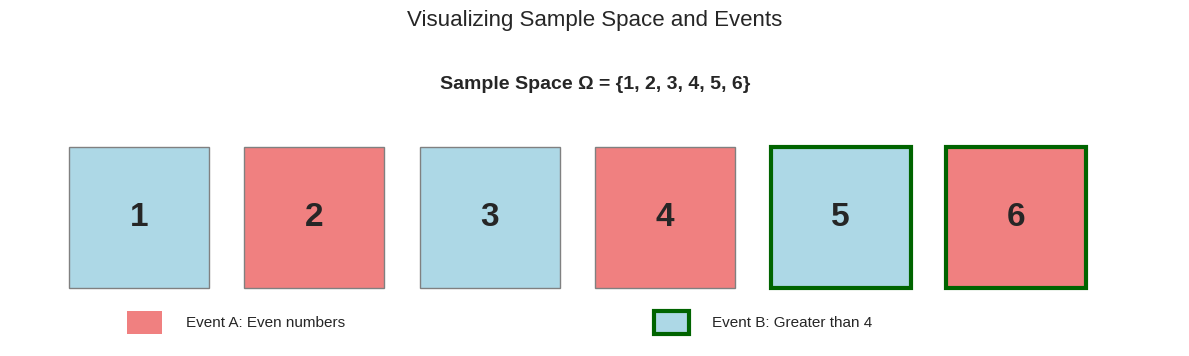

In [ ]:
# Visualize events on sample space
def visualize_sample_space():
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    # Draw sample space as rectangles
    colors = ['lightcoral' if i in event_even else 'lightblue' for i in range(1, 7)]
    edge_colors = ['darkgreen' if i in event_greater_than_4 else 'gray' for i in range(1, 7)]

    for i in range(6):
        rect = plt.Rectangle((i * 1.5, 0), 1.2, 1.2,
                             facecolor=colors[i],
                             edgecolor=edge_colors[i],
                             linewidth=3 if (i+1) in event_greater_than_4 else 1)
        ax.add_patch(rect)
        ax.text(i * 1.5 + 0.6, 0.6, str(i + 1), fontsize=24,
                ha='center', va='center', fontweight='bold')

    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 2)
    ax.set_aspect('equal')
    ax.axis('off')

    # Legend
    ax.text(4.5, 1.7, 'Sample Space Ω = {1, 2, 3, 4, 5, 6}',
            fontsize=14, ha='center', fontweight='bold')
    ax.add_patch(plt.Rectangle((0.5, -0.4), 0.3, 0.2, facecolor='lightcoral'))
    ax.text(1.0, -0.3, 'Event A: Even numbers', fontsize=11, va='center')
    ax.add_patch(plt.Rectangle((5, -0.4), 0.3, 0.2, facecolor='lightblue',
                               edgecolor='darkgreen', linewidth=3))
    ax.text(5.5, -0.3, 'Event B: Greater than 4', fontsize=11, va='center')

    plt.title('Visualizing Sample Space and Events', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

visualize_sample_space()

### Deep Learning Connection: Classification Probabilities

In classification, the **sample space** is the set of all classes, and the model outputs a **probability distribution** over this space!

DEEP LEARNING: Classification as Probability

Neural Network Classification:
Sample Space Ω = {'Cat', 'Dog', 'Rabbit', 'Bird', 'Fish'}

Class Probabilities (softmax output):
  P(Cat   ) = 0.5451
  P(Dog   ) = 0.1101
  P(Bird  ) = 0.0495
  P(Fish  ) = 0.2216
  P(Rabbit) = 0.0738

Sum of probabilities: 1.0000 (always = 1)
Predicted class: Cat


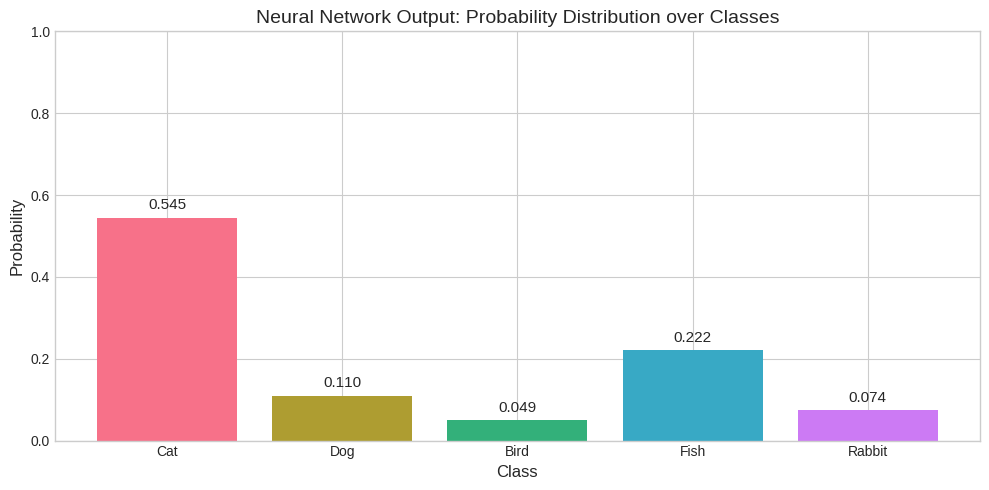

In [ ]:
# ============================================================
# DEEP LEARNING APPLICATION: Classification Output
# ============================================================

print("=" * 60)
print("DEEP LEARNING: Classification as Probability")
print("=" * 60)

# Simulated neural network output (logits)
logits = np.array([2.1, 0.5, -0.3, 1.2, 0.1])
class_names = ['Cat', 'Dog', 'Bird', 'Fish', 'Rabbit']

# Softmax converts logits to probabilities
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Numerical stability
    return exp_x / np.sum(exp_x)

probabilities = softmax(logits)

print("\nNeural Network Classification:")
print(f"Sample Space Ω = {set(class_names)}")
print("\nClass Probabilities (softmax output):")
for name, prob in zip(class_names, probabilities):
    print(f"  P({name:6s}) = {prob:.4f}")
print(f"\nSum of probabilities: {np.sum(probabilities):.4f} (always = 1)")
print(f"Predicted class: {class_names[np.argmax(probabilities)]}")

# Visualize
plt.figure(figsize=(10, 5))
bars = plt.bar(class_names, probabilities, color=sns.color_palette("husl", 5))
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Neural Network Output: Probability Distribution over Classes', fontsize=14)
plt.ylim(0, 1)
for bar, prob in zip(bars, probabilities):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{prob:.3f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

## 1.2 Probability Axioms (Kolmogorov Axioms)

All of probability theory is built on just **three axioms**:

1. **Non-negativity**: $P(A) \geq 0$ for any event $A$
2. **Normalization**: $P(\Omega) = 1$ (something must happen)
3. **Additivity**: For mutually exclusive events: $P(A \cup B) = P(A) + P(B)$

In [ ]:
# ============================================================
# PROBABILITY RULES (derived from axioms)
# ============================================================

print("=" * 60)
print("PROBABILITY RULES")
print("=" * 60)

# Using the die example
A = {2, 4, 6}  # Even
B = {5, 6}     # Greater than 4
omega = {1, 2, 3, 4, 5, 6}

P_A = len(A) / len(omega)
P_B = len(B) / len(omega)

# Complement Rule: P(not A) = 1 - P(A)
A_complement = omega - A
P_not_A = len(A_complement) / len(omega)
print(f"\n1. COMPLEMENT RULE: P(not A) = 1 - P(A)")
print(f"   A = {A}, A' = {A_complement}")
print(f"   P(not A) = 1 - {P_A:.4f} = {P_not_A:.4f}")

# Union Rule: P(A or B) = P(A) + P(B) - P(A and B)
A_and_B = A.intersection(B)
A_or_B = A.union(B)
P_A_and_B = len(A_and_B) / len(omega)
P_A_or_B = len(A_or_B) / len(omega)

print(f"\n2. ADDITION RULE: P(A ∪ B) = P(A) + P(B) - P(A ∩ B)")
print(f"   A ∩ B = {A_and_B}")
print(f"   A ∪ B = {A_or_B}")
print(f"   P(A ∪ B) = {P_A:.4f} + {P_B:.4f} - {P_A_and_B:.4f} = {P_A_or_B:.4f}")

PROBABILITY RULES

1. COMPLEMENT RULE: P(not A) = 1 - P(A)
   A = {2, 4, 6}, A' = {1, 3, 5}
   P(not A) = 1 - 0.5000 = 0.5000

2. ADDITION RULE: P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
   A ∩ B = {6}
   A ∪ B = {2, 4, 5, 6}
   P(A ∪ B) = 0.5000 + 0.3333 - 0.1667 = 0.6667


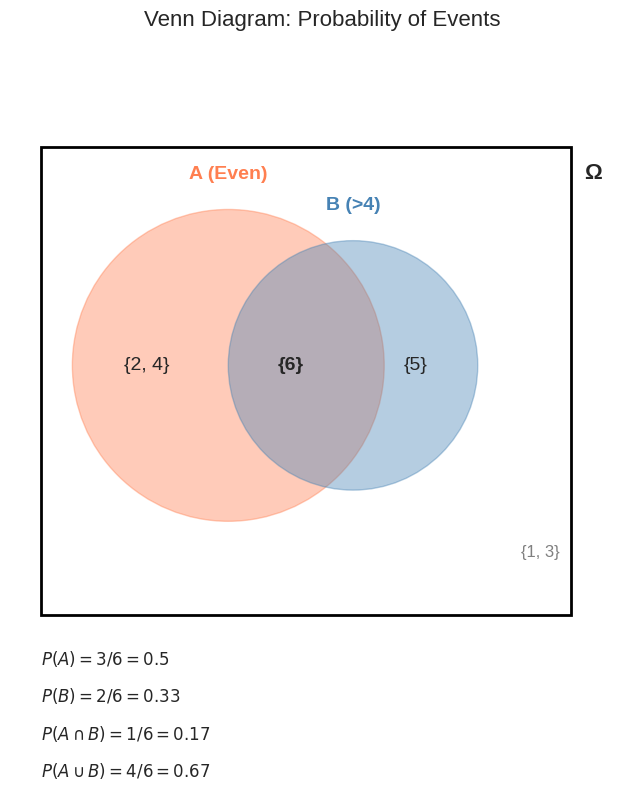

In [ ]:
# Visualize with Venn diagram
def draw_venn_diagram():
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw circles
    circle_A = plt.Circle((0.35, 0.5), 0.25, fill=True, alpha=0.4,
                          color='coral', label='A (Even)')
    circle_B = plt.Circle((0.55, 0.5), 0.2, fill=True, alpha=0.4,
                          color='steelblue', label='B (>4)')

    ax.add_patch(circle_A)
    ax.add_patch(circle_B)

    # Add labels for regions
    ax.text(0.22, 0.5, '{2, 4}', fontsize=14, ha='center', va='center')
    ax.text(0.45, 0.5, '{6}', fontsize=14, ha='center', va='center', fontweight='bold')
    ax.text(0.65, 0.5, '{5}', fontsize=14, ha='center', va='center')
    ax.text(0.85, 0.2, '{1, 3}', fontsize=12, ha='center', va='center', color='gray')

    # Labels
    ax.text(0.35, 0.8, 'A (Even)', fontsize=14, ha='center', fontweight='bold', color='coral')
    ax.text(0.55, 0.75, 'B (>4)', fontsize=14, ha='center', fontweight='bold', color='steelblue')

    # Sample space rectangle
    rect = plt.Rectangle((0.05, 0.1), 0.85, 0.75, fill=False,
                         edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    ax.text(0.92, 0.8, 'Ω', fontsize=16, fontweight='bold')

    # Formulas
    formulas = [
        r'$P(A) = 3/6 = 0.5$',
        r'$P(B) = 2/6 = 0.33$',
        r'$P(A \cap B) = 1/6 = 0.17$',
        r'$P(A \cup B) = 4/6 = 0.67$',
    ]
    for i, formula in enumerate(formulas):
        ax.text(0.05, 0.02 - i*0.06, formula, fontsize=12, transform=ax.transAxes)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title('Venn Diagram: Probability of Events', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

draw_venn_diagram()

---

# Part 2: Conditional Probability and Bayes' Theorem

## 2.1 Conditional Probability

**Conditional probability** is the probability of an event given that another event has occurred.

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Read as: "Probability of A **given** B"

---

In [ ]:
# ============================================================
# CONDITIONAL PROBABILITY EXAMPLE
# ============================================================

print("=" * 60)
print("CONDITIONAL PROBABILITY")
print("=" * 60)

# Example: Medical diagnosis
# Disease affects 1% of population
# Test is 95% accurate (true positive rate)
# Test has 10% false positive rate

P_disease = 0.01  # Prior probability of disease
P_positive_given_disease = 0.95  # Sensitivity
P_positive_given_no_disease = 0.10  # False positive rate

print("\nMedical Test Scenario:")
print(f"  P(Disease) = {P_disease:.2f} (1% of population has disease)")
print(f"  P(Positive | Disease) = {P_positive_given_disease:.2f} (sensitivity)")
print(f"  P(Positive | No Disease) = {P_positive_given_no_disease:.2f} (false positive)")

# Calculate P(Positive) using law of total probability
P_no_disease = 1 - P_disease
P_positive = (P_positive_given_disease * P_disease +
              P_positive_given_no_disease * P_no_disease)

print(f"\n  P(Positive) = {P_positive:.4f} (total probability of positive test)")

CONDITIONAL PROBABILITY

Medical Test Scenario:
  P(Disease) = 0.01 (1% of population has disease)
  P(Positive | Disease) = 0.95 (sensitivity)
  P(Positive | No Disease) = 0.10 (false positive)

  P(Positive) = 0.1085 (total probability of positive test)


## 2.2 Bayes' Theorem

Bayes' theorem lets us **reverse** conditional probabilities:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Or more explicitly:

$$\underbrace{P(A|B)}_{\text{Posterior}} = \frac{\overbrace{P(B|A)}^{\text{Likelihood}} \cdot \overbrace{P(A)}^{\text{Prior}}}{\underbrace{P(B)}_{\text{Evidence}}}$$

In [ ]:
# ============================================================
# BAYES' THEOREM - The Key Question
# ============================================================

print("=" * 60)
print("BAYES' THEOREM")
print("=" * 60)

# The key question: If test is positive, what's P(Disease)?
# P(Disease | Positive) = P(Positive | Disease) * P(Disease) / P(Positive)

P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

print("\nQuestion: If your test is POSITIVE, do you have the disease?")
print("\nApplying Bayes' Theorem:")
print(f"  P(Disease | Positive) = P(Positive | Disease) × P(Disease) / P(Positive)")
print(f"                       = {P_positive_given_disease} × {P_disease} / {P_positive:.4f}")
print(f"                       = {P_disease_given_positive:.4f}")
print(f"\n>>> Only {P_disease_given_positive*100:.1f}% chance of disease despite positive test!")
print("\nWhy so low? Because the disease is rare (1%), so most positives are false positives.")

BAYES' THEOREM

Question: If your test is POSITIVE, do you have the disease?

Applying Bayes' Theorem:
  P(Disease | Positive) = P(Positive | Disease) × P(Disease) / P(Positive)
                       = 0.95 × 0.01 / 0.1085
                       = 0.0876

>>> Only 8.8% chance of disease despite positive test!

Why so low? Because the disease is rare (1%), so most positives are false positives.


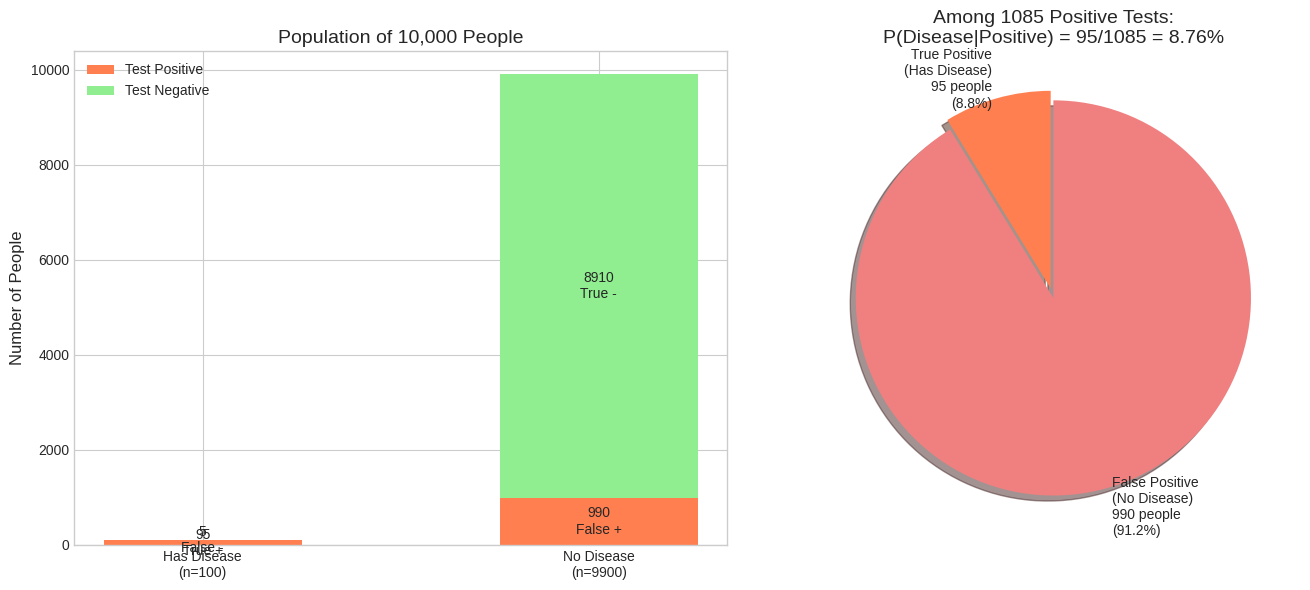

In [ ]:
# Visualize Bayes' Theorem
def visualize_bayes():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Left: Population breakdown
    ax = axes[0]

    # Assume 10,000 people
    N = 10000
    diseased = int(N * P_disease)  # 100
    healthy = N - diseased  # 9900

    true_positive = int(diseased * P_positive_given_disease)  # 95
    false_negative = diseased - true_positive  # 5
    false_positive = int(healthy * P_positive_given_no_disease)  # 990
    true_negative = healthy - false_positive  # 8910

    # Create stacked bar chart
    categories = ['Has Disease\n(n=100)', 'No Disease\n(n=9900)']
    positive_tests = [true_positive, false_positive]
    negative_tests = [false_negative, true_negative]

    x = np.arange(len(categories))
    width = 0.5

    bars1 = ax.bar(x, positive_tests, width, label='Test Positive', color='coral')
    bars2 = ax.bar(x, negative_tests, width, bottom=positive_tests,
                   label='Test Negative', color='lightgreen')

    ax.set_ylabel('Number of People', fontsize=12)
    ax.set_title('Population of 10,000 People', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    # Add labels
    ax.text(0, true_positive/2, f'{true_positive}\nTrue +', ha='center', va='center', fontsize=10)
    ax.text(0, true_positive + false_negative/2, f'{false_negative}\nFalse -',
            ha='center', va='center', fontsize=10)
    ax.text(1, false_positive/2, f'{false_positive}\nFalse +', ha='center', va='center', fontsize=10)
    ax.text(1, false_positive + true_negative/2, f'{true_negative}\nTrue -',
            ha='center', va='center', fontsize=10)

    # Right: Zoom into positive tests
    ax2 = axes[1]
    total_positive = true_positive + false_positive
    sizes = [true_positive, false_positive]
    labels = [f'True Positive\n(Has Disease)\n{true_positive} people\n({true_positive/total_positive*100:.1f}%)',
              f'False Positive\n(No Disease)\n{false_positive} people\n({false_positive/total_positive*100:.1f}%)']
    colors = ['coral', 'lightcoral']
    explode = (0.05, 0)

    ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='',
            shadow=True, startangle=90)
    ax2.set_title(f'Among {total_positive} Positive Tests:\nP(Disease|Positive) = {true_positive}/{total_positive} = {P_disease_given_positive:.2%}',
                  fontsize=14)

    plt.tight_layout()
    plt.show()

visualize_bayes()

---

# Part 4: Expected Value, Variance, and Moments

## 4.1 Expected Value (Mean)

The **expected value** is the "average" outcome weighted by probability.

### Discrete:
$$E[X] = \sum_x x \cdot P(X = x)$$

### Continuous:
$$E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx$$

---

In [ ]:
# ============================================================
# EXPECTED VALUE
# ============================================================

print("=" * 60)
print("EXPECTED VALUE (MEAN)")
print("=" * 60)

# Example 1: Fair die
print("\n1. Fair Die:")
values = np.arange(1, 7)
probs = np.ones(6) / 6
expected_value = np.sum(values * probs)
print(f"   E[X] = Σ x·P(x) = (1+2+3+4+5+6)/6 = {expected_value:.2f}")

# Example 2: Loaded die
print("\n2. Loaded Die (6 is more likely):")
loaded_probs = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
expected_loaded = np.sum(values * loaded_probs)
print(f"   Probabilities: {loaded_probs}")
print(f"   E[X] = {expected_loaded:.2f}")

# Simulate to verify
np.random.seed(42)
fair_samples = np.random.choice(values, size=10000, p=probs)
loaded_samples = np.random.choice(values, size=10000, p=loaded_probs)

print(f"\n   Simulation (10,000 rolls):")
print(f"   Fair die mean: {np.mean(fair_samples):.3f}")
print(f"   Loaded die mean: {np.mean(loaded_samples):.3f}")

EXPECTED VALUE (MEAN)

1. Fair Die:
   E[X] = Σ x·P(x) = (1+2+3+4+5+6)/6 = 3.50

2. Loaded Die (6 is more likely):
   Probabilities: [0.1 0.1 0.1 0.1 0.1 0.5]
   E[X] = 4.50

   Simulation (10,000 rolls):
   Fair die mean: 3.467
   Loaded die mean: 4.524


## 4.2 Variance and Standard Deviation

**Variance** measures how spread out values are from the mean.

$$\text{Var}(X) = E[(X - \mu)^2] = E[X^2] - (E[X])^2$$

**Standard Deviation** is the square root of variance:
$$\sigma = \sqrt{\text{Var}(X)}$$

VARIANCE AND STANDARD DEVIATION

Fair Die:
  Mean μ = 3.50
  Variance σ² = E[(X - μ)²] = 2.9167
  Std Dev σ = 1.7078


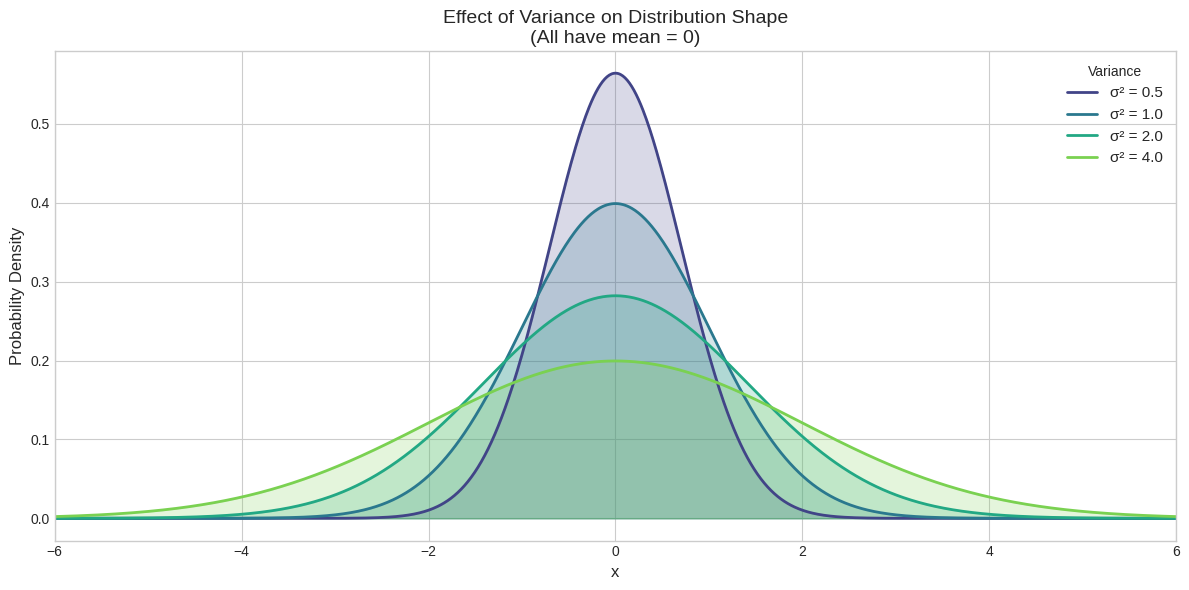


→ Higher variance = more spread out distribution
→ Lower variance = more concentrated around mean


In [ ]:
# ============================================================
# VARIANCE AND STANDARD DEVIATION
# ============================================================

print("=" * 60)
print("VARIANCE AND STANDARD DEVIATION")
print("=" * 60)

# Compute variance for fair die
mean = expected_value
variance = np.sum((values - mean)**2 * probs)
std_dev = np.sqrt(variance)

print(f"\nFair Die:")
print(f"  Mean μ = {mean:.2f}")
print(f"  Variance σ² = E[(X - μ)²] = {variance:.4f}")
print(f"  Std Dev σ = {std_dev:.4f}")

# Visualize distributions with different variances
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(-6, 6, 1000)
variances = [0.5, 1.0, 2.0, 4.0]
colors = sns.color_palette("viridis", len(variances))

for var, color in zip(variances, colors):
    pdf = stats.norm.pdf(x, 0, np.sqrt(var))
    ax.plot(x, pdf, linewidth=2, label=f'σ² = {var}', color=color)
    ax.fill_between(x, pdf, alpha=0.2, color=color)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_title('Effect of Variance on Distribution Shape\n(All have mean = 0)', fontsize=14)
ax.legend(title='Variance', fontsize=11)
ax.set_xlim(-6, 6)
plt.tight_layout()
plt.show()

print("\n→ Higher variance = more spread out distribution")
print("→ Lower variance = more concentrated around mean")

### Deep Learning Connection: Loss Functions and Risk

In deep learning, the **loss function** is an expected value!

$$\text{Risk} = E_{(x,y) \sim \mathcal{D}}[\mathcal{L}(f(x), y)]$$

We minimize the expected loss over the data distribution.

DEEP LEARNING: Expected Value and Loss Functions

MSE Loss = E[(y - ŷ)²]

Loss for different weight values:
  w = 0.5: MSE = 0.8315
  w = 1.5: MSE = 0.1657
  w = 2.0: MSE = 0.0888
  w = 2.5: MSE = 0.1827


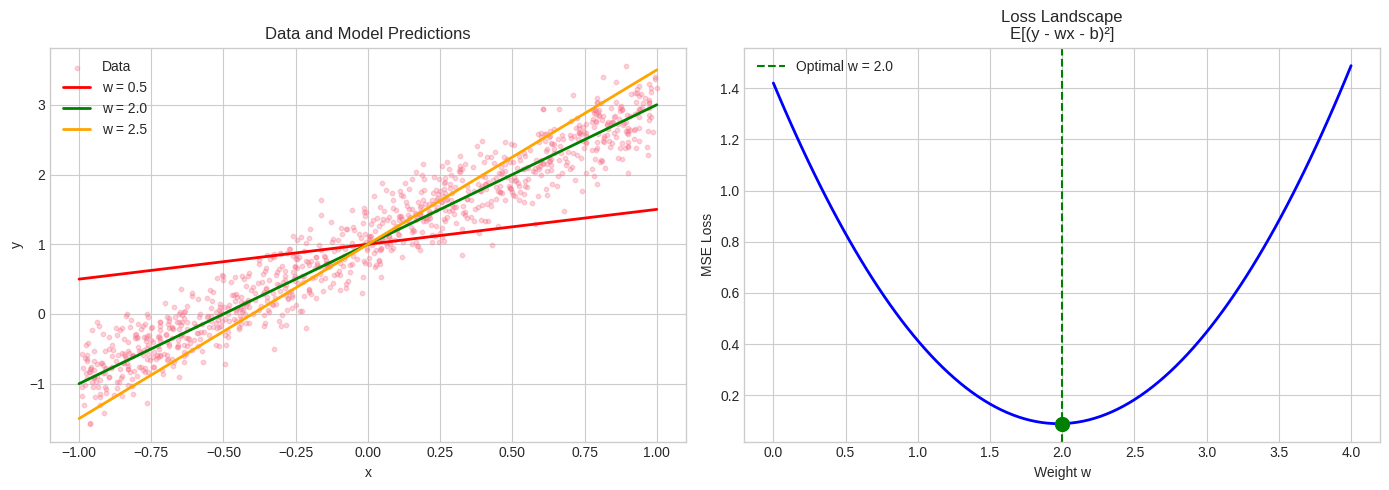


→ Training minimizes the EXPECTED loss over the data distribution


In [ ]:
# ============================================================
# DEEP LEARNING: Expected Value as Loss Function
# ============================================================

print("=" * 60)
print("DEEP LEARNING: Expected Value and Loss Functions")
print("=" * 60)

# Simulate training data
np.random.seed(42)
n_samples = 1000

# True relationship: y = 2x + 1 + noise
X = np.random.uniform(-1, 1, n_samples)
y_true = 2 * X + 1
y = y_true + np.random.normal(0, 0.3, n_samples)

# Model predictions with different weights
weights = [0.5, 1.5, 2.0, 2.5]  # True weight is 2.0
bias = 1.0

def mse_loss(y_true, y_pred):
    """Mean Squared Error = Expected squared difference"""
    return np.mean((y_true - y_pred) ** 2)

print("\nMSE Loss = E[(y - ŷ)²]")
print("\nLoss for different weight values:")
for w in weights:
    y_pred = w * X + bias
    loss = mse_loss(y, y_pred)
    print(f"  w = {w:.1f}: MSE = {loss:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Data and predictions
ax1 = axes[0]
ax1.scatter(X, y, alpha=0.3, s=10, label='Data')
for w, color in zip([0.5, 2.0, 2.5], ['red', 'green', 'orange']):
    x_line = np.linspace(-1, 1, 100)
    y_line = w * x_line + bias
    ax1.plot(x_line, y_line, linewidth=2, label=f'w = {w}', color=color)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Data and Model Predictions')
ax1.legend()

# Right: Loss landscape
ax2 = axes[1]
w_range = np.linspace(0, 4, 100)
losses = [mse_loss(y, w * X + bias) for w in w_range]
ax2.plot(w_range, losses, 'b-', linewidth=2)
ax2.axvline(x=2.0, color='green', linestyle='--', label='Optimal w = 2.0')
ax2.scatter([2.0], [mse_loss(y, 2.0 * X + bias)], color='green', s=100, zorder=5)
ax2.set_xlabel('Weight w')
ax2.set_ylabel('MSE Loss')
ax2.set_title('Loss Landscape\nE[(y - wx - b)²]')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n→ Training minimizes the EXPECTED loss over the data distribution")

---

# Part 5: Common Distributions in Deep Learning

These are the **most important distributions** you'll encounter in deep learning!

| Distribution | Type | Deep Learning Use |
|--------------|------|-------------------|
| **Bernoulli** | Discrete | Binary classification, dropout |
| **Categorical** | Discrete | Multi-class classification |
| **Gaussian (Normal)** | Continuous | Weight initialization, noise, VAE |
| **Uniform** | Continuous | Weight initialization, data augmentation |

---

## 5.1 Bernoulli Distribution

For binary outcomes: success (1) or failure (0).

$$P(X = 1) = p, \quad P(X = 0) = 1 - p$$

BERNOULLI DISTRIBUTION

Bernoulli(p = 0.7):
  P(X = 1) = 0.7
  P(X = 0) = 0.30000000000000004
  E[X] = p = 0.7
  Var(X) = p(1-p) = 0.21

DEEP LEARNING: Dropout as Bernoulli

Dropout rate: 0.3
Original activations: [[ 0.5  -0.14  0.65  1.52 -0.23 -0.23  1.58  0.77 -0.47  0.54]]
Dropout mask (Bernoulli): [[1 1 1 1 1 1 1 1 1 1]]
After dropout: [[ 0.5  -0.14  0.65  1.52 -0.23 -0.23  1.58  0.77 -0.47  0.54]]

→ Each neuron is kept with probability 0.7 (Bernoulli)


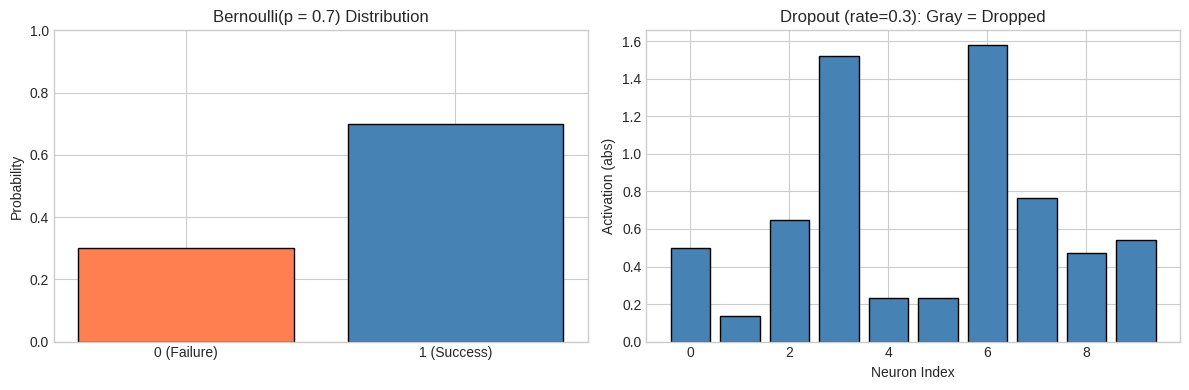

In [ ]:
# ============================================================
# BERNOULLI DISTRIBUTION
# ============================================================

print("=" * 60)
print("BERNOULLI DISTRIBUTION")
print("=" * 60)

# Properties
p = 0.7
print(f"\nBernoulli(p = {p}):")
print(f"  P(X = 1) = {p}")
print(f"  P(X = 0) = {1-p}")
print(f"  E[X] = p = {p}")
print(f"  Var(X) = p(1-p) = {p*(1-p):.2f}")

# Deep Learning Application: Dropout
print("\n" + "=" * 60)
print("DEEP LEARNING: Dropout as Bernoulli")
print("=" * 60)

dropout_rate = 0.3  # 30% neurons dropped
keep_prob = 1 - dropout_rate

# Simulate dropout on a layer
np.random.seed(42)
activations = np.random.randn(1, 10)  # 10 neurons
dropout_mask = np.random.binomial(1, keep_prob, activations.shape)

print(f"\nDropout rate: {dropout_rate}")
print(f"Original activations: {activations.round(2)}")
print(f"Dropout mask (Bernoulli): {dropout_mask}")
print(f"After dropout: {(activations * dropout_mask).round(2)}")
print(f"\n→ Each neuron is kept with probability {keep_prob} (Bernoulli)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bernoulli PMF
ax1 = axes[0]
ax1.bar([0, 1], [1-p, p], color=['coral', 'steelblue'], edgecolor='black')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['0 (Failure)', '1 (Success)'])
ax1.set_ylabel('Probability')
ax1.set_title(f'Bernoulli(p = {p}) Distribution')
ax1.set_ylim(0, 1)

# Dropout visualization
ax2 = axes[1]
colors = ['lightgray' if m == 0 else 'steelblue' for m in dropout_mask[0]]
ax2.bar(range(10), np.abs(activations[0]), color=colors, edgecolor='black')
ax2.set_xlabel('Neuron Index')
ax2.set_ylabel('Activation (abs)')
ax2.set_title(f'Dropout (rate={dropout_rate}): Gray = Dropped')

plt.tight_layout()
plt.show()

## 5.2 Gaussian (Normal) Distribution

The **most important distribution** in deep learning!

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

Notation: $X \sim \mathcal{N}(\mu, \sigma^2)$

GAUSSIAN (NORMAL) DISTRIBUTION

Standard Normal N(μ=0, σ²=1):
  Mean: μ = 0
  Variance: σ² = 1
  Std Dev: σ = 1

Key Properties (68-95-99.7 Rule):
  P(μ - σ < X < μ + σ) ≈ 68.27%
  P(μ - 2σ < X < μ + 2σ) ≈ 95.45%
  P(μ - 3σ < X < μ + 3σ) ≈ 99.73%


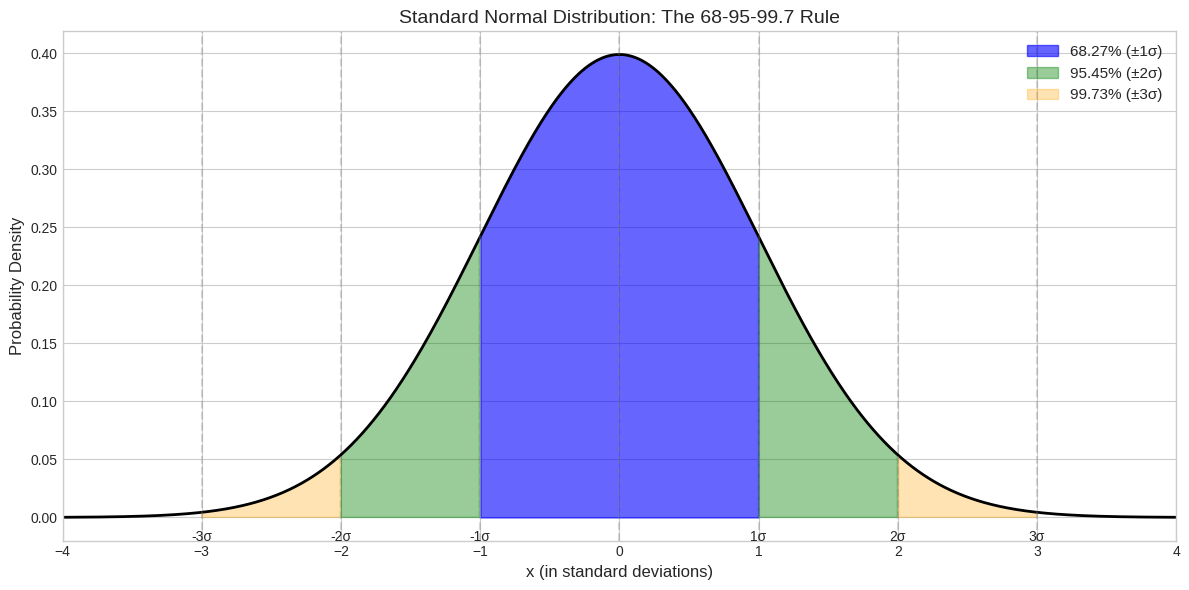

In [ ]:
# ============================================================
# GAUSSIAN (NORMAL) DISTRIBUTION
# ============================================================

print("=" * 60)
print("GAUSSIAN (NORMAL) DISTRIBUTION")
print("=" * 60)

mu, sigma = 0, 1
print(f"\nStandard Normal N(μ={mu}, σ²={sigma**2}):")
print(f"  Mean: μ = {mu}")
print(f"  Variance: σ² = {sigma**2}")
print(f"  Std Dev: σ = {sigma}")

# Key properties
print("\nKey Properties (68-95-99.7 Rule):")
print(f"  P(μ - σ < X < μ + σ) ≈ 68.27%")
print(f"  P(μ - 2σ < X < μ + 2σ) ≈ 95.45%")
print(f"  P(μ - 3σ < X < μ + 3σ) ≈ 99.73%")

# Visualize the 68-95-99.7 rule
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

ax.plot(x, y, 'k-', linewidth=2)
ax.fill_between(x, y, where=(x >= -1) & (x <= 1), alpha=0.6, color='blue', label='68.27% (±1σ)')
ax.fill_between(x, y, where=((x >= -2) & (x < -1)) | ((x > 1) & (x <= 2)),
                alpha=0.4, color='green', label='95.45% (±2σ)')
ax.fill_between(x, y, where=((x >= -3) & (x < -2)) | ((x > 2) & (x <= 3)),
                alpha=0.3, color='orange', label='99.73% (±3σ)')

ax.set_xlabel('x (in standard deviations)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_title('Standard Normal Distribution: The 68-95-99.7 Rule', fontsize=14)
ax.legend(loc='upper right', fontsize=11)
ax.set_xlim(-4, 4)

# Add sigma markers
for i in range(-3, 4):
    ax.axvline(x=i, color='gray', linestyle='--', alpha=0.3)
    if i != 0:
        ax.text(i, -0.02, f'{i}σ', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

DEEP LEARNING: Gaussian Weight Initialization

He Initialization: N(0, 0.0505²)
  → For ReLU activations
Xavier Initialization: N(0, 0.0439²)
  → For tanh/sigmoid activations


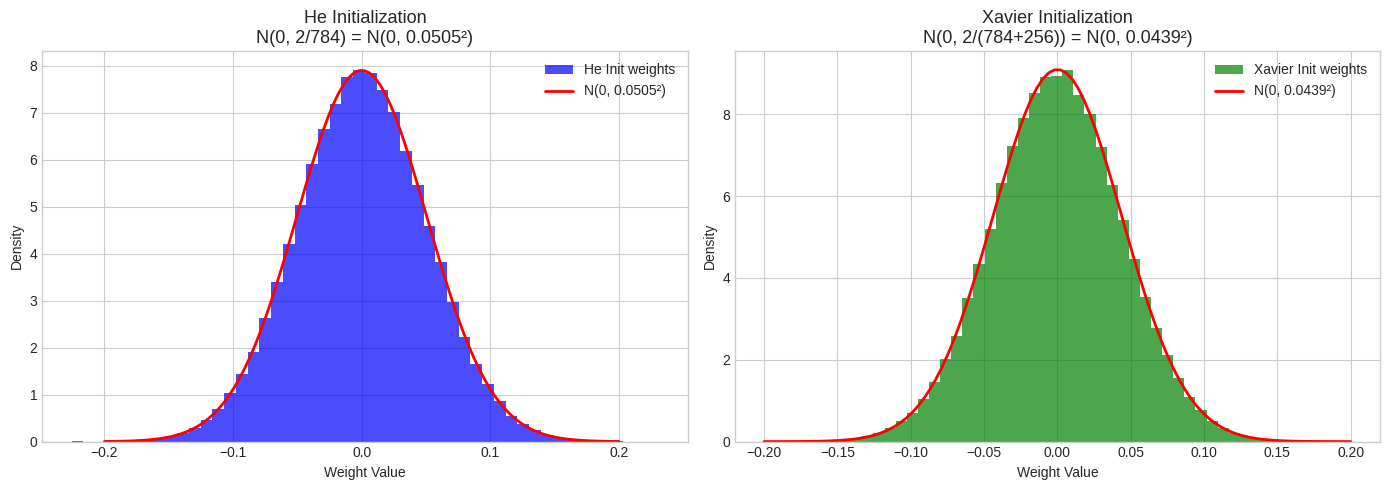


→ Proper initialization prevents vanishing/exploding gradients!


In [ ]:
# ============================================================
# DEEP LEARNING: Gaussian in Weight Initialization
# ============================================================

print("=" * 60)
print("DEEP LEARNING: Gaussian Weight Initialization")
print("=" * 60)

n_in, n_out = 784, 256

# He Initialization for ReLU: N(0, 2/n_in)
he_std = np.sqrt(2.0 / n_in)
he_weights = np.random.normal(0, he_std, (n_in, n_out))

# Xavier Initialization for tanh/sigmoid: N(0, 2/(n_in + n_out))
xavier_std = np.sqrt(2.0 / (n_in + n_out))
xavier_weights = np.random.normal(0, xavier_std, (n_in, n_out))

print(f"\nHe Initialization: N(0, {he_std:.4f}²)")
print(f"  → For ReLU activations")
print(f"Xavier Initialization: N(0, {xavier_std:.4f}²)")
print(f"  → For tanh/sigmoid activations")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.hist(he_weights.flatten(), bins=50, density=True, alpha=0.7, color='blue',
         label='He Init weights')
x = np.linspace(-0.2, 0.2, 100)
ax1.plot(x, stats.norm.pdf(x, 0, he_std), 'r-', linewidth=2, label=f'N(0, {he_std:.4f}²)')
ax1.set_title(f'He Initialization\nN(0, 2/{n_in}) = N(0, {he_std:.4f}²)', fontsize=13)
ax1.set_xlabel('Weight Value')
ax1.set_ylabel('Density')
ax1.legend()

ax2 = axes[1]
ax2.hist(xavier_weights.flatten(), bins=50, density=True, alpha=0.7, color='green',
         label='Xavier Init weights')
ax2.plot(x, stats.norm.pdf(x, 0, xavier_std), 'r-', linewidth=2, label=f'N(0, {xavier_std:.4f}²)')
ax2.set_title(f'Xavier Initialization\nN(0, 2/({n_in}+{n_out})) = N(0, {xavier_std:.4f}²)', fontsize=13)
ax2.set_xlabel('Weight Value')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n→ Proper initialization prevents vanishing/exploding gradients!")

---

# Part 6: Information Theory

Information theory provides the **mathematical foundation for loss functions** in deep learning!

---

## 6.1 Entropy

**Entropy** measures the "uncertainty" or "surprise" in a probability distribution.

$$H(X) = -\sum_x P(x) \log P(x) = E[-\log P(X)]$$

- High entropy = High uncertainty (uniform distribution)
- Low entropy = Low uncertainty (peaked distribution)

ENTROPY - Measuring Uncertainty

Entropy for different 4-class distributions:
--------------------------------------------------
Uniform [0.25, 0.25, 0.25, 0.25]:
  H = 2.0000 bits
Peaked [0.7, 0.1, 0.1, 0.1]:
  H = 1.3568 bits
Very peaked [0.97, 0.01, 0.01, 0.01]:
  H = 0.2419 bits
Certain [1.0, 0.0, 0.0, 0.0]:
  H = -0.0000 bits
--------------------------------------------------
Maximum entropy for 4 classes: log₂(4) = 2.0 bits


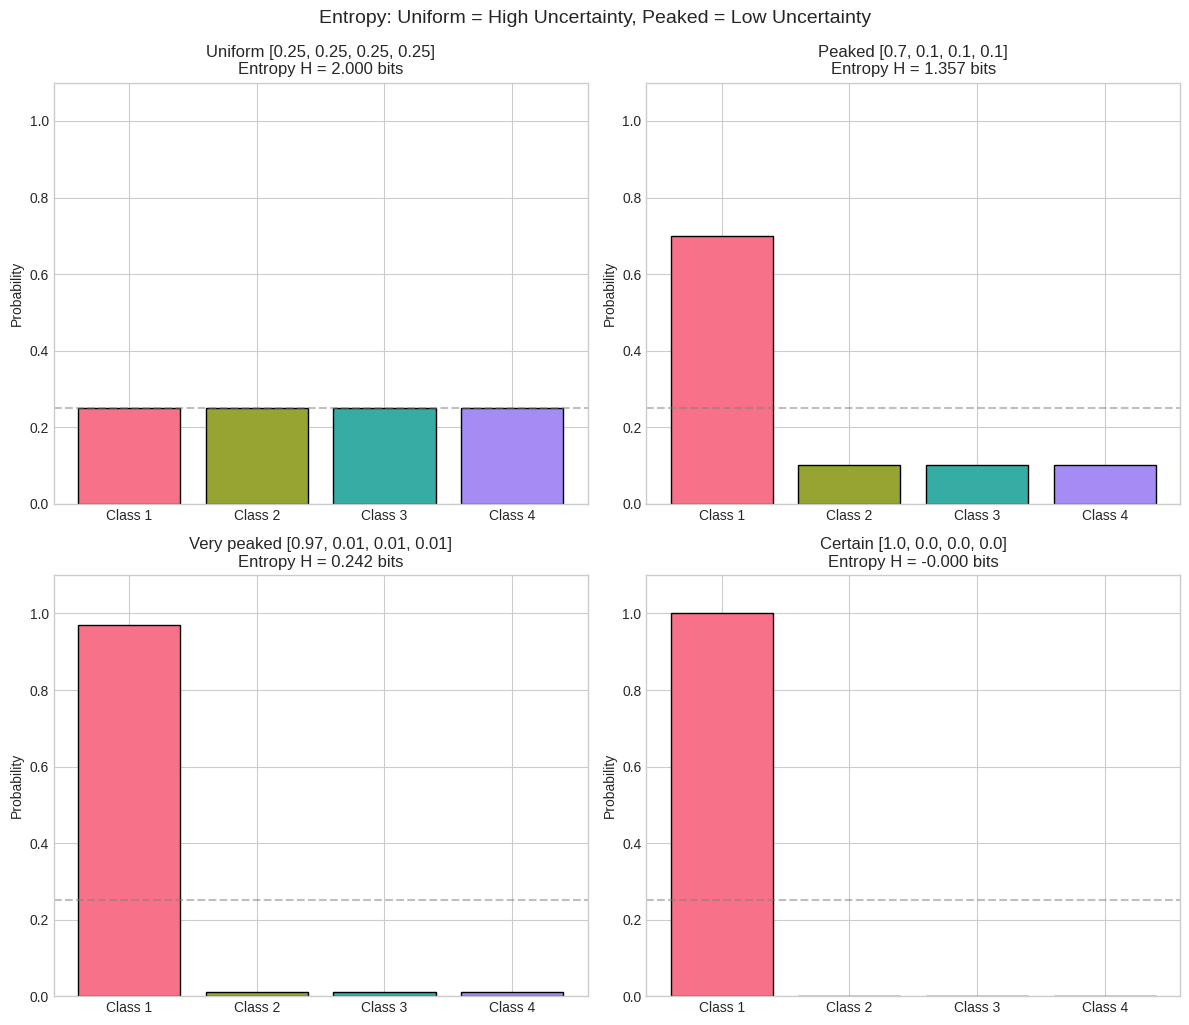

In [ ]:
# ============================================================
# ENTROPY
# ============================================================

print("=" * 60)
print("ENTROPY - Measuring Uncertainty")
print("=" * 60)

def entropy(probs):
    """Compute entropy: H(X) = -Σ p(x) log p(x)"""
    probs = np.array(probs)
    probs = probs[probs > 0]  # Avoid log(0)
    return -np.sum(probs * np.log2(probs))

# Compare different distributions
distributions = {
    "Uniform [0.25, 0.25, 0.25, 0.25]": [0.25, 0.25, 0.25, 0.25],
    "Peaked [0.7, 0.1, 0.1, 0.1]": [0.7, 0.1, 0.1, 0.1],
    "Very peaked [0.97, 0.01, 0.01, 0.01]": [0.97, 0.01, 0.01, 0.01],
    "Certain [1.0, 0.0, 0.0, 0.0]": [1.0, 0.0, 0.0, 0.0],
}

print("\nEntropy for different 4-class distributions:")
print("-" * 50)
for name, probs in distributions.items():
    H = entropy(probs)
    print(f"{name}:\n  H = {H:.4f} bits")
print("-" * 50)
print("Maximum entropy for 4 classes: log₂(4) = 2.0 bits")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, probs) in zip(axes, distributions.items()):
    H = entropy(probs)
    bars = ax.bar(['Class 1', 'Class 2', 'Class 3', 'Class 4'], probs,
                  color=sns.color_palette("husl", 4), edgecolor='black')
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Probability')
    ax.set_title(f'{name}\nEntropy H = {H:.3f} bits', fontsize=12)
    ax.axhline(y=0.25, color='gray', linestyle='--', alpha=0.5, label='Uniform')

plt.tight_layout()
plt.suptitle('Entropy: Uniform = High Uncertainty, Peaked = Low Uncertainty',
             y=1.02, fontsize=14)
plt.show()

## 6.2 Cross-Entropy

**Cross-entropy** measures the difference between two probability distributions.

$$H(P, Q) = -\sum_x P(x) \log Q(x) = E_P[-\log Q(X)]$$

This is the **most common loss function** for classification!

### Deep Learning Connection
- $P$: True distribution (one-hot labels)
- $Q$: Predicted distribution (softmax output)
- Minimizing cross-entropy = Making predictions match true labels

CROSS-ENTROPY LOSS

True label (one-hot): [1 0 0 0]

Cross-entropy loss for different predictions:
--------------------------------------------------
Perfect      [1. 0. 0. 0.] → Loss = 0.0000
Good         [0.8  0.1  0.05 0.05] → Loss = 0.2231
Uncertain    [0.4 0.3 0.2 0.1] → Loss = 0.9163
Wrong        [0.1 0.7 0.1 0.1] → Loss = 2.3026
--------------------------------------------------
→ Lower loss = Better prediction!


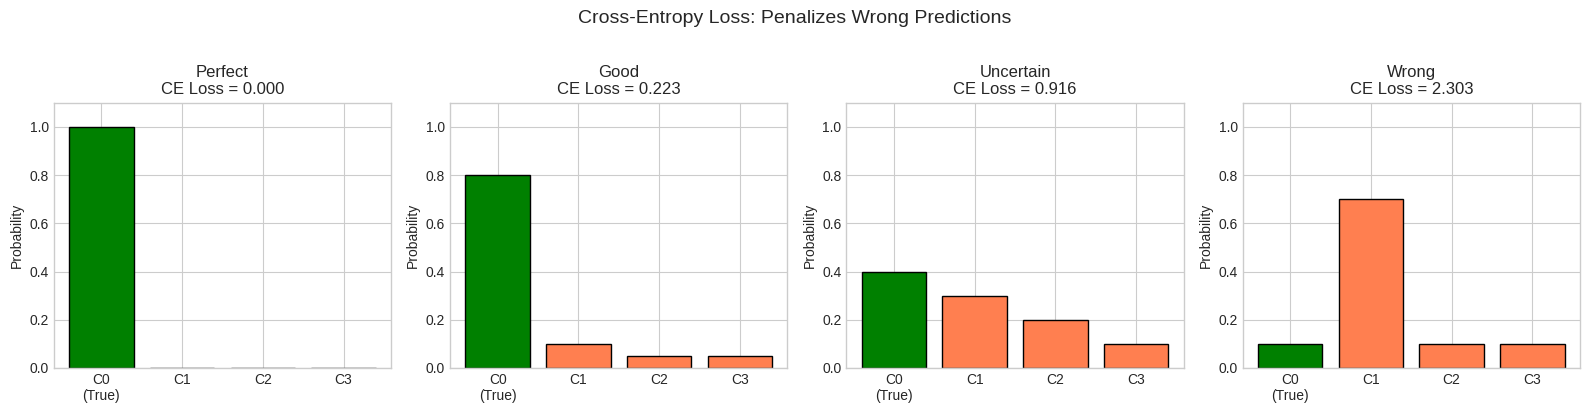

In [ ]:
# ============================================================
# CROSS-ENTROPY - THE Classification Loss
# ============================================================

print("=" * 60)
print("CROSS-ENTROPY LOSS")
print("=" * 60)

def cross_entropy(p_true, q_pred):
    """Cross-entropy: H(P, Q) = -Σ P(x) log Q(x)"""
    epsilon = 1e-15  # Avoid log(0)
    q_pred = np.clip(q_pred, epsilon, 1 - epsilon)
    return -np.sum(p_true * np.log(q_pred))

# True label: class 0 (one-hot)
p_true = np.array([1, 0, 0, 0])

# Different predictions
predictions = {
    "Perfect": np.array([1.0, 0.0, 0.0, 0.0]),
    "Good": np.array([0.8, 0.1, 0.05, 0.05]),
    "Uncertain": np.array([0.4, 0.3, 0.2, 0.1]),
    "Wrong": np.array([0.1, 0.7, 0.1, 0.1]),
}

print(f"\nTrue label (one-hot): {p_true}")
print("\nCross-entropy loss for different predictions:")
print("-" * 50)
for name, q_pred in predictions.items():
    loss = cross_entropy(p_true, q_pred)
    print(f"{name:12s} {q_pred} → Loss = {loss:.4f}")
print("-" * 50)
print("→ Lower loss = Better prediction!")

# Visualize
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for ax, (name, q_pred) in zip(axes, predictions.items()):
    loss = cross_entropy(p_true, q_pred)
    colors = ['green' if i == 0 else 'coral' for i in range(4)]
    ax.bar(['C0\n(True)', 'C1', 'C2', 'C3'], q_pred, color=colors, edgecolor='black')
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Probability')
    ax.set_title(f'{name}\nCE Loss = {loss:.3f}', fontsize=12)

plt.suptitle('Cross-Entropy Loss: Penalizes Wrong Predictions', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

## 6.3 KL Divergence

**Kullback-Leibler Divergence** measures how one distribution differs from another.

$$D_{KL}(P \| Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)} = H(P, Q) - H(P)$$

**Key Properties:**
- $D_{KL} \geq 0$ always (Gibbs' inequality)
- $D_{KL} = 0$ only when $P = Q$
- Not symmetric: $D_{KL}(P \| Q) \neq D_{KL}(Q \| P)$

### Deep Learning Applications:
- **VAE**: KL divergence regularizes the latent space
- **Knowledge Distillation**: Matches student to teacher distribution

KL DIVERGENCE

True distribution P: [0.4 0.3 0.2 0.1]

KL Divergence D_KL(P || Q) for different Q:
--------------------------------------------------
  Q = [0.4 0.3 0.2 0.1] (Same as P   ) → D_KL = 0.0000
  Q = [0.35 0.25 0.25 0.15] (Close to P  ) → D_KL = 0.0229
  Q = [0.25 0.25 0.25 0.25] (Uniform     ) → D_KL = 0.1064
  Q = [0.1 0.2 0.3 0.4] (Reversed    ) → D_KL = 0.4564

→ KL Divergence is NOT symmetric:
  D_KL(P || Q_uniform) = 0.1064
  D_KL(Q_uniform || P) = 0.1218


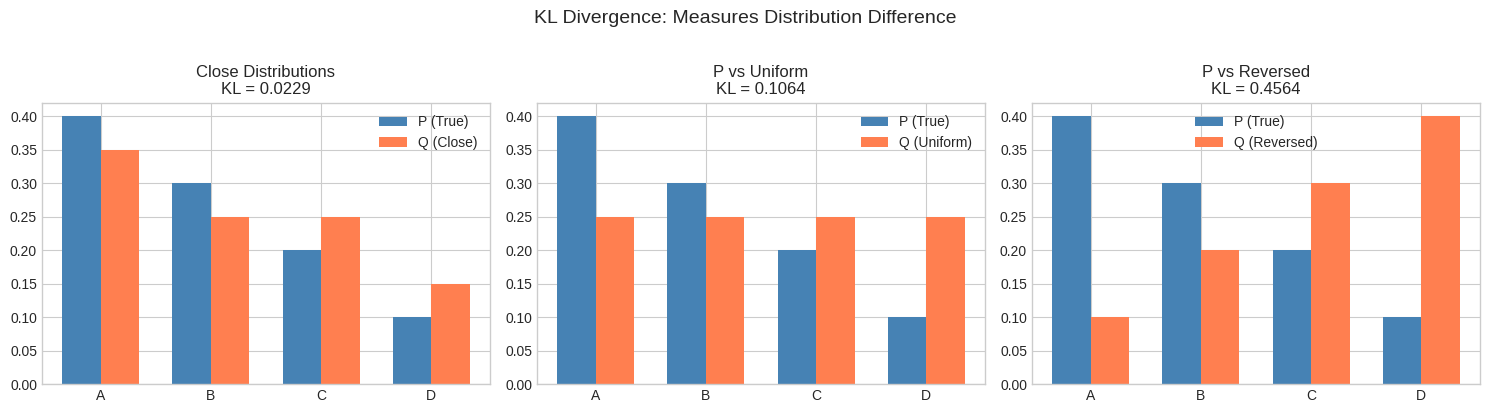

In [ ]:
# ============================================================
# KL DIVERGENCE
# ============================================================

print("=" * 60)
print("KL DIVERGENCE")
print("=" * 60)

def kl_divergence(p, q):
    """KL Divergence: D_KL(P || Q) = Σ P(x) log(P(x)/Q(x))"""
    epsilon = 1e-15
    p = np.array(p) + epsilon
    q = np.array(q) + epsilon
    return np.sum(p * np.log(p / q))

# Compare distributions
p = np.array([0.4, 0.3, 0.2, 0.1])  # True distribution
q1 = np.array([0.4, 0.3, 0.2, 0.1])  # Same as P
q2 = np.array([0.35, 0.25, 0.25, 0.15])  # Close to P
q3 = np.array([0.25, 0.25, 0.25, 0.25])  # Uniform
q4 = np.array([0.1, 0.2, 0.3, 0.4])  # Reversed

print(f"\nTrue distribution P: {p}")
print("\nKL Divergence D_KL(P || Q) for different Q:")
print("-" * 50)
for name, q in [("Same as P", q1), ("Close to P", q2), ("Uniform", q3), ("Reversed", q4)]:
    kl = kl_divergence(p, q)
    print(f"  Q = {q} ({name:12s}) → D_KL = {kl:.4f}")

# Visualize asymmetry
print(f"\n→ KL Divergence is NOT symmetric:")
print(f"  D_KL(P || Q_uniform) = {kl_divergence(p, q3):.4f}")
print(f"  D_KL(Q_uniform || P) = {kl_divergence(q3, p):.4f}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Compare P and different Qs
x = ['A', 'B', 'C', 'D']

ax1 = axes[0]
width = 0.35
ax1.bar(np.arange(4) - width/2, p, width, label='P (True)', color='steelblue')
ax1.bar(np.arange(4) + width/2, q2, width, label='Q (Close)', color='coral')
ax1.set_xticks(np.arange(4))
ax1.set_xticklabels(x)
ax1.legend()
ax1.set_title(f'Close Distributions\nKL = {kl_divergence(p, q2):.4f}')

ax2 = axes[1]
ax2.bar(np.arange(4) - width/2, p, width, label='P (True)', color='steelblue')
ax2.bar(np.arange(4) + width/2, q3, width, label='Q (Uniform)', color='coral')
ax2.set_xticks(np.arange(4))
ax2.set_xticklabels(x)
ax2.legend()
ax2.set_title(f'P vs Uniform\nKL = {kl_divergence(p, q3):.4f}')

ax3 = axes[2]
ax3.bar(np.arange(4) - width/2, p, width, label='P (True)', color='steelblue')
ax3.bar(np.arange(4) + width/2, q4, width, label='Q (Reversed)', color='coral')
ax3.set_xticks(np.arange(4))
ax3.set_xticklabels(x)
ax3.legend()
ax3.set_title(f'P vs Reversed\nKL = {kl_divergence(p, q4):.4f}')

plt.suptitle('KL Divergence: Measures Distribution Difference', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

---

# Part 7: Maximum Likelihood Estimation (MLE)

**MLE** is the foundation of how neural networks learn!

## The Idea
Find parameters $\theta$ that maximize the probability of observing the data:

$$\hat{\theta}_{MLE} = \arg\max_\theta P(\mathcal{D} | \theta) = \arg\max_\theta \prod_{i=1}^N P(x_i | \theta)$$

In practice, we minimize **negative log-likelihood**:

$$\hat{\theta}_{MLE} = \arg\min_\theta \left[ -\sum_{i=1}^N \log P(x_i | \theta) \right]$$

---

MAXIMUM LIKELIHOOD ESTIMATION (MLE)

True parameters: μ = 5.0, σ = 2.0
Generated 100 samples

MLE estimates:
  μ̂ = 4.7923 (true: 5.0)
  σ̂ = 1.8072 (true: 2.0)


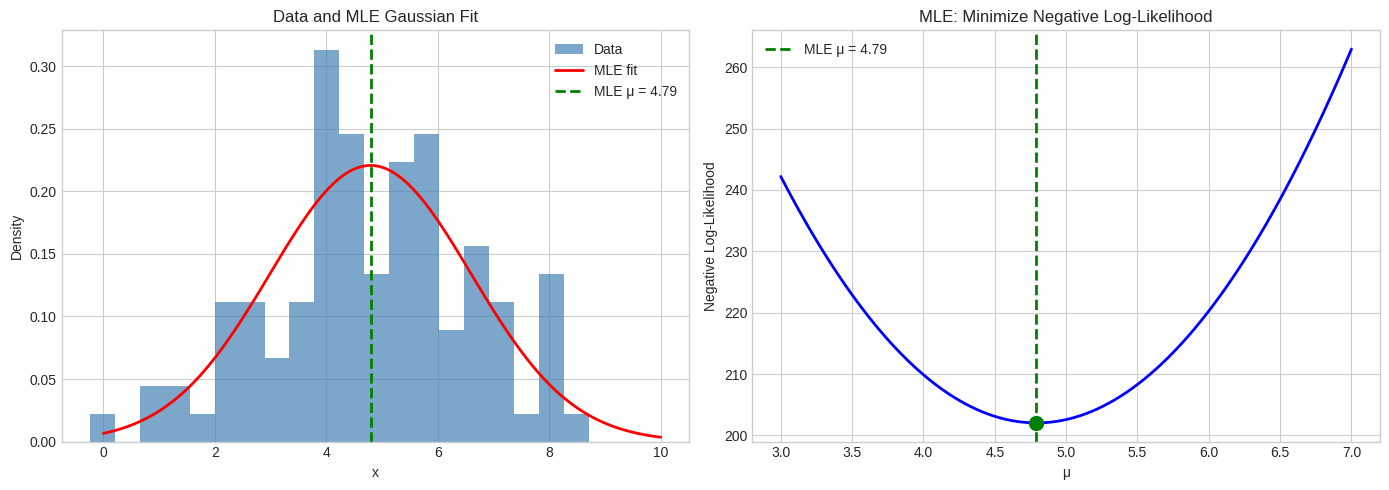


→ Neural network training is MLE in disguise!
  Cross-entropy loss = Negative log-likelihood for classification


In [ ]:
# ============================================================
# MAXIMUM LIKELIHOOD ESTIMATION
# ============================================================

print("=" * 60)
print("MAXIMUM LIKELIHOOD ESTIMATION (MLE)")
print("=" * 60)

# Example: Estimate mean of Gaussian from data
np.random.seed(42)
true_mean = 5.0
true_std = 2.0
data = np.random.normal(true_mean, true_std, 100)

print(f"\nTrue parameters: μ = {true_mean}, σ = {true_std}")
print(f"Generated {len(data)} samples")

# MLE for Gaussian mean: just the sample mean!
mle_mean = np.mean(data)
mle_std = np.std(data, ddof=0)

print(f"\nMLE estimates:")
print(f"  μ̂ = {mle_mean:.4f} (true: {true_mean})")
print(f"  σ̂ = {mle_std:.4f} (true: {true_std})")

# Visualize the likelihood landscape
def neg_log_likelihood(mu, data, sigma=true_std):
    """Negative log-likelihood for Gaussian with known sigma"""
    return np.sum((data - mu)**2) / (2 * sigma**2) + len(data) * np.log(sigma * np.sqrt(2*np.pi))

mu_range = np.linspace(3, 7, 100)
nll_values = [neg_log_likelihood(mu, data) for mu in mu_range]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Data histogram
ax1 = axes[0]
ax1.hist(data, bins=20, density=True, alpha=0.7, color='steelblue', label='Data')
x = np.linspace(0, 10, 100)
ax1.plot(x, stats.norm.pdf(x, mle_mean, mle_std), 'r-', linewidth=2, label=f'MLE fit')
ax1.axvline(mle_mean, color='green', linestyle='--', linewidth=2, label=f'MLE μ = {mle_mean:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title('Data and MLE Gaussian Fit')
ax1.legend()

# NLL landscape
ax2 = axes[1]
ax2.plot(mu_range, nll_values, 'b-', linewidth=2)
ax2.axvline(mle_mean, color='green', linestyle='--', linewidth=2, label=f'MLE μ = {mle_mean:.2f}')
ax2.scatter([mle_mean], [neg_log_likelihood(mle_mean, data)], color='green', s=100, zorder=5)
ax2.set_xlabel('μ')
ax2.set_ylabel('Negative Log-Likelihood')
ax2.set_title('MLE: Minimize Negative Log-Likelihood')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n→ Neural network training is MLE in disguise!")
print("  Cross-entropy loss = Negative log-likelihood for classification")

---

# Part 8: Sampling Methods

Sampling is essential for **training** and **inference** in deep learning!

### Where Sampling is Used:
- **Mini-batch SGD**: Sample batches from training data
- **Dropout**: Sample which neurons to drop
- **VAE/GANs**: Sample from latent distributions
- **Monte Carlo estimation**: Approximate expectations

---

### Deep Learning Connection: Bayesian Neural Networks

In **Bayesian Deep Learning**, we treat weights as probability distributions:

$$P(\mathbf{w}|\mathcal{D}) = \frac{P(\mathcal{D}|\mathbf{w}) \cdot P(\mathbf{w})}{P(\mathcal{D})}$$

- $P(\mathbf{w})$: **Prior** belief about weights
- $P(\mathcal{D}|\mathbf{w})$: **Likelihood** of data given weights
- $P(\mathbf{w}|\mathcal{D})$: **Posterior** belief after seeing data

DEEP LEARNING: Bayesian Weight Updates

Prior: weight ~ N(0, 1.0²)
Observed data mean: 0.630
Posterior: weight ~ N(0.625, 0.089²)


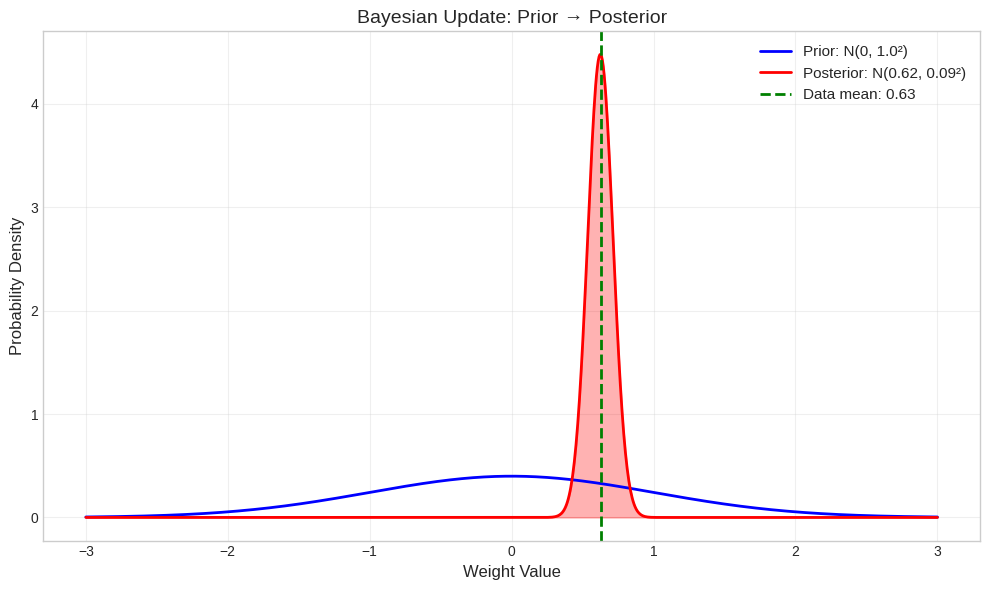


→ After seeing data, our uncertainty about the weight DECREASES
→ The posterior is sharper (lower variance) than the prior


In [ ]:
# ============================================================
# DEEP LEARNING APPLICATION: Bayesian Update
# ============================================================

print("=" * 60)
print("DEEP LEARNING: Bayesian Weight Updates")
print("=" * 60)

# Simulate Bayesian update of a weight
# Prior: We believe weight is around 0
prior_mean = 0
prior_std = 1.0

# After seeing data, we update our belief
# (Simplified example with Gaussian conjugate prior)
observed_data = np.array([0.5, 0.7, 0.6, 0.8, 0.55])
data_mean = np.mean(observed_data)
data_std = 0.2  # Assumed noise level
n = len(observed_data)

# Posterior parameters (conjugate Gaussian)
posterior_precision = 1/prior_std**2 + n/data_std**2
posterior_mean = (prior_mean/prior_std**2 + n*data_mean/data_std**2) / posterior_precision
posterior_std = 1/np.sqrt(posterior_precision)

print(f"\nPrior: weight ~ N({prior_mean}, {prior_std}²)")
print(f"Observed data mean: {data_mean:.3f}")
print(f"Posterior: weight ~ N({posterior_mean:.3f}, {posterior_std:.3f}²)")

# Visualize
x = np.linspace(-3, 3, 1000)
prior = stats.norm.pdf(x, prior_mean, prior_std)
posterior = stats.norm.pdf(x, posterior_mean, posterior_std)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, 'b-', linewidth=2, label=f'Prior: N({prior_mean}, {prior_std}²)')
plt.plot(x, posterior, 'r-', linewidth=2,
         label=f'Posterior: N({posterior_mean:.2f}, {posterior_std:.2f}²)')
plt.axvline(data_mean, color='g', linestyle='--', linewidth=2,
            label=f'Data mean: {data_mean:.2f}')
plt.fill_between(x, posterior, alpha=0.3, color='red')
plt.xlabel('Weight Value', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Bayesian Update: Prior → Posterior', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n→ After seeing data, our uncertainty about the weight DECREASES")
print("→ The posterior is sharper (lower variance) than the prior")

---

# Part 3: Random Variables and Probability Distributions

## 3.1 Random Variables

A **random variable** is a function that assigns a number to each outcome in a sample space.

- **Discrete**: Takes on countable values (e.g., dice roll, class label)
- **Continuous**: Takes on any value in a range (e.g., weight, pixel intensity)

---

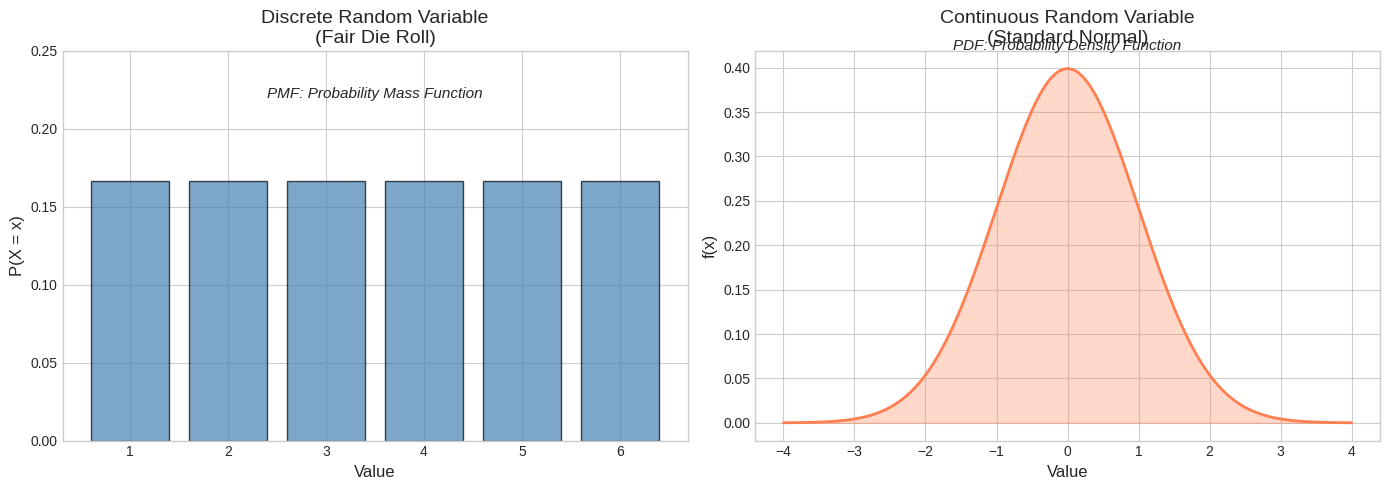

Key Difference:
  • Discrete: P(X = x) can be > 0 (mass at specific points)
  • Continuous: P(X = x) = 0, but P(a < X < b) > 0 (area under curve)


In [ ]:
# ============================================================
# DISCRETE VS CONTINUOUS RANDOM VARIABLES
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Discrete: Die roll
ax1 = axes[0]
x_discrete = np.arange(1, 7)
pmf = np.ones(6) / 6  # Uniform probability
ax1.bar(x_discrete, pmf, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Value', fontsize=12)
ax1.set_ylabel('P(X = x)', fontsize=12)
ax1.set_title('Discrete Random Variable\n(Fair Die Roll)', fontsize=14)
ax1.set_xticks(x_discrete)
ax1.set_ylim(0, 0.25)
ax1.text(3.5, 0.22, 'PMF: Probability Mass Function', ha='center', fontsize=11, style='italic')

# Continuous: Normal distribution
ax2 = axes[1]
x_continuous = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x_continuous, 0, 1)
ax2.plot(x_continuous, pdf, 'coral', linewidth=2)
ax2.fill_between(x_continuous, pdf, alpha=0.3, color='coral')
ax2.set_xlabel('Value', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('Continuous Random Variable\n(Standard Normal)', fontsize=14)
ax2.text(0, 0.42, 'PDF: Probability Density Function', ha='center', fontsize=11, style='italic')

plt.tight_layout()
plt.show()

print("Key Difference:")
print("  • Discrete: P(X = x) can be > 0 (mass at specific points)")
print("  • Continuous: P(X = x) = 0, but P(a < X < b) > 0 (area under curve)")

## 3.2 Probability Mass Function (PMF) and Probability Density Function (PDF)

### PMF (Discrete)
$$P(X = x) = p(x)$$
$$\sum_x p(x) = 1$$

### PDF (Continuous)
$$P(a \leq X \leq b) = \int_a^b f(x)dx$$
$$\int_{-\infty}^{\infty} f(x)dx = 1$$

CUMULATIVE DISTRIBUTION FUNCTION (CDF)

CDF: F(x) = P(X ≤ x)
The probability that X is less than or equal to x


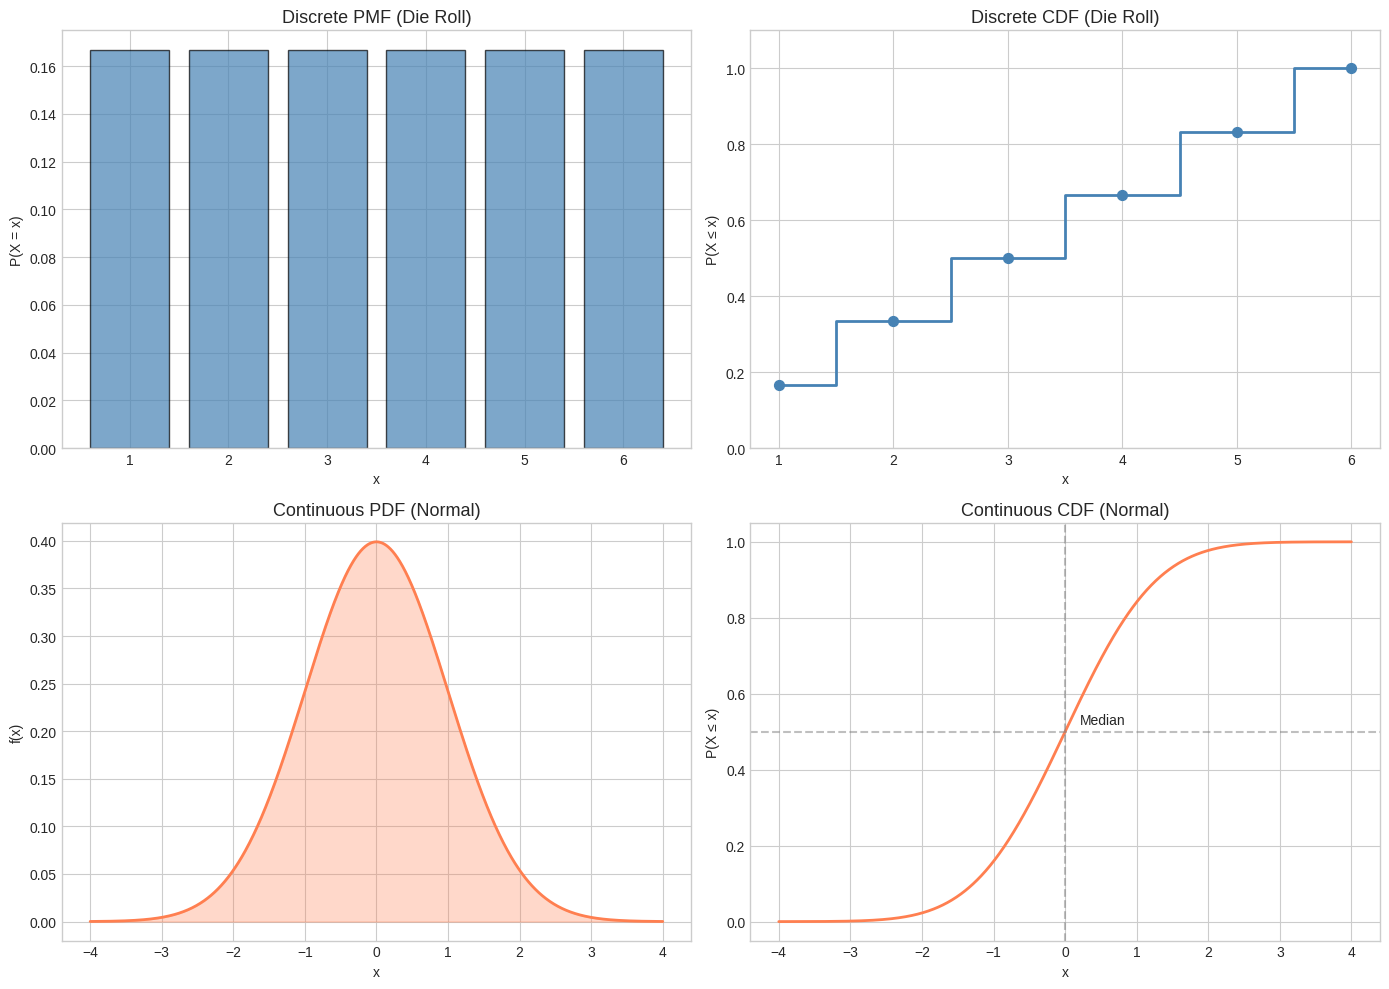

In [ ]:
# ============================================================
# CUMULATIVE DISTRIBUTION FUNCTION (CDF)
# ============================================================

print("=" * 60)
print("CUMULATIVE DISTRIBUTION FUNCTION (CDF)")
print("=" * 60)
print("\nCDF: F(x) = P(X ≤ x)")
print("The probability that X is less than or equal to x")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Discrete PMF and CDF
x_discrete = np.arange(1, 7)
pmf = np.ones(6) / 6
cdf_discrete = np.cumsum(pmf)

axes[0, 0].bar(x_discrete, pmf, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Discrete PMF (Die Roll)', fontsize=13)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('P(X = x)')

axes[0, 1].step(x_discrete, cdf_discrete, where='mid', color='steelblue', linewidth=2)
axes[0, 1].scatter(x_discrete, cdf_discrete, color='steelblue', s=50, zorder=5)
axes[0, 1].set_title('Discrete CDF (Die Roll)', fontsize=13)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('P(X ≤ x)')
axes[0, 1].set_ylim(0, 1.1)

# Continuous PDF and CDF
x_continuous = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x_continuous, 0, 1)
cdf_continuous = stats.norm.cdf(x_continuous, 0, 1)

axes[1, 0].plot(x_continuous, pdf, 'coral', linewidth=2)
axes[1, 0].fill_between(x_continuous, pdf, alpha=0.3, color='coral')
axes[1, 0].set_title('Continuous PDF (Normal)', fontsize=13)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')

axes[1, 1].plot(x_continuous, cdf_continuous, 'coral', linewidth=2)
axes[1, 1].set_title('Continuous CDF (Normal)', fontsize=13)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('P(X ≤ x)')
axes[1, 1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[1, 1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 1].text(0.2, 0.52, 'Median', fontsize=10)

plt.tight_layout()
plt.show()

## 8.1 Monte Carlo Estimation

**Monte Carlo methods** use random sampling to estimate quantities that are hard to compute analytically.

$$E[f(X)] \approx \frac{1}{N} \sum_{i=1}^N f(x_i), \quad x_i \sim P(X)$$

As $N \to \infty$, this estimate converges to the true expectation (Law of Large Numbers).

MONTE CARLO ESTIMATION

Estimating E[X²] for X ~ N(0, 1)
True value: E[X²] = 1.0

Monte Carlo estimates:
----------------------------------------
  N =     10: Estimate = 0.6712, Error = 0.3288
  N =    100: Estimate = 0.8281, Error = 0.1719
  N =   1000: Estimate = 0.9823, Error = 0.0177
  N =  10000: Estimate = 1.0035, Error = 0.0035
  N = 100000: Estimate = 1.0010, Error = 0.0010


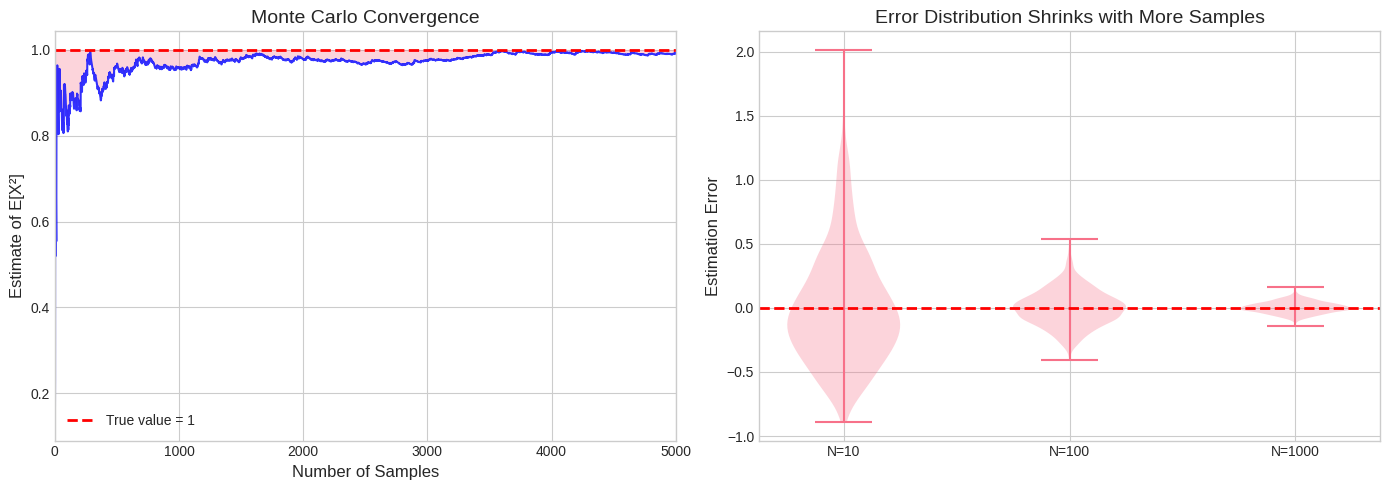


→ More samples = Better estimate (lower variance)
→ Monte Carlo is used in: policy gradients, dropout at test time, VAE training


In [ ]:
# ============================================================
# MONTE CARLO ESTIMATION
# ============================================================

print("=" * 60)
print("MONTE CARLO ESTIMATION")
print("=" * 60)

# Example: Estimate E[X^2] for X ~ N(0, 1)
# True value: E[X^2] = Var(X) + (E[X])^2 = 1 + 0 = 1

def monte_carlo_estimate(n_samples):
    """Estimate E[X^2] using n_samples from N(0,1)"""
    samples = np.random.normal(0, 1, n_samples)
    return np.mean(samples ** 2)

# Show convergence
np.random.seed(42)
sample_sizes = [10, 100, 1000, 10000, 100000]
true_value = 1.0

print("\nEstimating E[X²] for X ~ N(0, 1)")
print(f"True value: E[X²] = {true_value}")
print("\nMonte Carlo estimates:")
print("-" * 40)
for n in sample_sizes:
    estimate = monte_carlo_estimate(n)
    error = abs(estimate - true_value)
    print(f"  N = {n:>6d}: Estimate = {estimate:.4f}, Error = {error:.4f}")

# Visualize convergence
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Running estimate
ax1 = axes[0]
np.random.seed(42)
n_max = 5000
samples = np.random.normal(0, 1, n_max)
running_estimates = np.cumsum(samples**2) / np.arange(1, n_max + 1)

ax1.plot(running_estimates, 'b-', linewidth=1.5, alpha=0.8)
ax1.axhline(y=true_value, color='red', linestyle='--', linewidth=2, label='True value = 1')
ax1.set_xlabel('Number of Samples', fontsize=12)
ax1.set_ylabel('Estimate of E[X²]', fontsize=12)
ax1.set_title('Monte Carlo Convergence', fontsize=14)
ax1.legend()
ax1.set_xlim(0, n_max)
ax1.fill_between(range(n_max), running_estimates, true_value, alpha=0.3)

# Error distribution with different sample sizes
ax2 = axes[1]
n_experiments = 1000
errors = {n: [] for n in [10, 100, 1000]}

for n in errors.keys():
    for _ in range(n_experiments):
        estimate = monte_carlo_estimate(n)
        errors[n].append(estimate - true_value)

positions = [1, 2, 3]
ax2.violinplot([errors[n] for n in [10, 100, 1000]], positions)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xticks(positions)
ax2.set_xticklabels(['N=10', 'N=100', 'N=1000'])
ax2.set_ylabel('Estimation Error', fontsize=12)
ax2.set_title('Error Distribution Shrinks with More Samples', fontsize=14)

plt.tight_layout()
plt.show()

print("\n→ More samples = Better estimate (lower variance)")
print("→ Monte Carlo is used in: policy gradients, dropout at test time, VAE training")

## 8.2 Mini-Batch Sampling in SGD

**Stochastic Gradient Descent** approximates the true gradient using a random mini-batch:

$$\nabla_\theta \mathcal{L} = E_{(x,y) \sim \mathcal{D}} [\nabla_\theta \ell(\theta; x, y)] \approx \frac{1}{B} \sum_{i=1}^B \nabla_\theta \ell(\theta; x_i, y_i)$$

This is Monte Carlo estimation of the gradient!

MINI-BATCH SAMPLING IN STOCHASTIC GRADIENT DESCENT

True gradient at w=2.5, b=1.5:
  ∂L/∂w = -0.9396
  ∂L/∂b = -1.0902

Mini-batch gradient estimates (100 trials):
------------------------------------------------------------
  Batch Size |   Mean ∂L/∂w |    Std ∂L/∂w | Relative Err
------------------------------------------------------------
           1 |      -0.8878 |       1.7712 |       188.5%
           8 |      -0.9193 |       0.6380 |        67.9%
          32 |      -0.8858 |       0.3046 |        32.4%
         128 |      -0.9058 |       0.1695 |        18.0%
         512 |      -0.9388 |       0.0601 |         6.4%


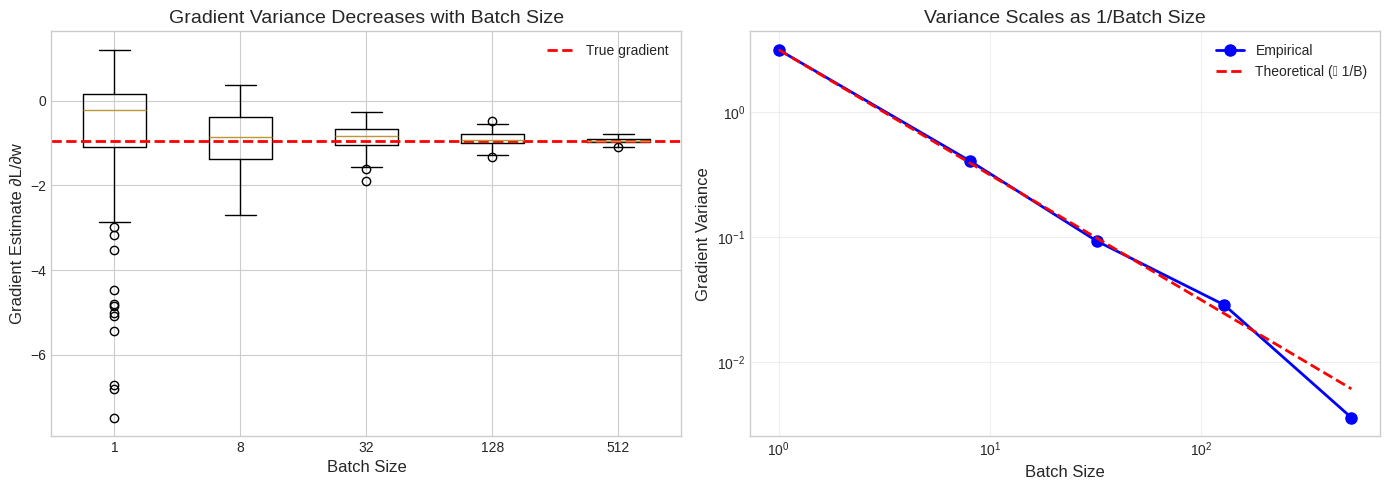


→ Larger batch = Lower variance, but slower per-epoch training
→ Sweet spot: batch size 32-256 balances speed and gradient quality


In [ ]:
# ============================================================
# MINI-BATCH SAMPLING FOR SGD
# ============================================================

print("=" * 60)
print("MINI-BATCH SAMPLING IN STOCHASTIC GRADIENT DESCENT")
print("=" * 60)

# Create synthetic dataset
np.random.seed(42)
N = 1000  # Total samples
X_data = np.random.randn(N, 1)
y_data = 3 * X_data + 2 + np.random.randn(N, 1) * 0.5  # y = 3x + 2 + noise

# True gradient for linear regression: dL/dw = -2/N * X^T(y - Xw)
w_true = 3.0
b_true = 2.0

def compute_gradient(X, y, w, b):
    """Compute gradient of MSE loss w.r.t. w and b"""
    y_pred = X * w + b
    error = y - y_pred
    grad_w = -2 * np.mean(X * error)
    grad_b = -2 * np.mean(error)
    return grad_w, grad_b

# Compare full-batch vs mini-batch gradient estimates
w_test, b_test = 2.5, 1.5  # Test point

# Full batch (true gradient)
true_grad_w, true_grad_b = compute_gradient(X_data, y_data, w_test, b_test)

# Mini-batch estimates with different batch sizes
batch_sizes = [1, 8, 32, 128, 512]
n_trials = 100

print(f"\nTrue gradient at w={w_test}, b={b_test}:")
print(f"  ∂L/∂w = {true_grad_w:.4f}")
print(f"  ∂L/∂b = {true_grad_b:.4f}")

print("\nMini-batch gradient estimates (100 trials):")
print("-" * 60)
print(f"{'Batch Size':>12} | {'Mean ∂L/∂w':>12} | {'Std ∂L/∂w':>12} | {'Relative Err':>12}")
print("-" * 60)

batch_grad_stats = {}
for B in batch_sizes:
    grad_w_samples = []
    for _ in range(n_trials):
        idx = np.random.choice(N, B, replace=False)
        X_batch = X_data[idx]
        y_batch = y_data[idx]
        gw, gb = compute_gradient(X_batch, y_batch, w_test, b_test)
        grad_w_samples.append(gw)

    mean_grad = np.mean(grad_w_samples)
    std_grad = np.std(grad_w_samples)
    rel_err = std_grad / abs(true_grad_w) * 100
    batch_grad_stats[B] = grad_w_samples
    print(f"{B:>12} | {mean_grad:>12.4f} | {std_grad:>12.4f} | {rel_err:>11.1f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gradient variance by batch size
ax1 = axes[0]
ax1.boxplot([batch_grad_stats[B] for B in batch_sizes], labels=[str(B) for B in batch_sizes])
ax1.axhline(y=true_grad_w, color='red', linestyle='--', linewidth=2, label='True gradient')
ax1.set_xlabel('Batch Size', fontsize=12)
ax1.set_ylabel('Gradient Estimate ∂L/∂w', fontsize=12)
ax1.set_title('Gradient Variance Decreases with Batch Size', fontsize=14)
ax1.legend()

# Variance vs batch size (theoretical: Var ∝ 1/B)
ax2 = axes[1]
variances = [np.var(batch_grad_stats[B]) for B in batch_sizes]
ax2.loglog(batch_sizes, variances, 'bo-', linewidth=2, markersize=8, label='Empirical')
# Theoretical line: Var ∝ 1/B
theoretical = variances[0] * batch_sizes[0] / np.array(batch_sizes)
ax2.loglog(batch_sizes, theoretical, 'r--', linewidth=2, label='Theoretical (∝ 1/B)')
ax2.set_xlabel('Batch Size', fontsize=12)
ax2.set_ylabel('Gradient Variance', fontsize=12)
ax2.set_title('Variance Scales as 1/Batch Size', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n→ Larger batch = Lower variance, but slower per-epoch training")
print("→ Sweet spot: batch size 32-256 balances speed and gradient quality")

## 8.3 The Reparameterization Trick (VAE)

In **Variational Autoencoders (VAEs)**, we need to backpropagate through random sampling. The **reparameterization trick** makes this possible!

### The Problem
We want to sample: $z \sim \mathcal{N}(\mu, \sigma^2)$

But sampling is **non-differentiable** - can't backprop through random noise!

### The Solution (Reparameterization)
Instead of sampling $z$ directly, we sample noise $\epsilon \sim \mathcal{N}(0, 1)$ and transform it:

$$z = \mu + \sigma \cdot \epsilon$$

Now we can backprop through $\mu$ and $\sigma$!

THE REPARAMETERIZATION TRICK (VAE)

Encoder outputs:
  μ (mean) = 2.5
  log(σ²) = 0.5
  σ (std) = 1.2840

Both methods produce the same distribution:
  Direct: mean = 2.5248, std = 1.2567
  Reparam: mean = 2.5248, std = 1.2567


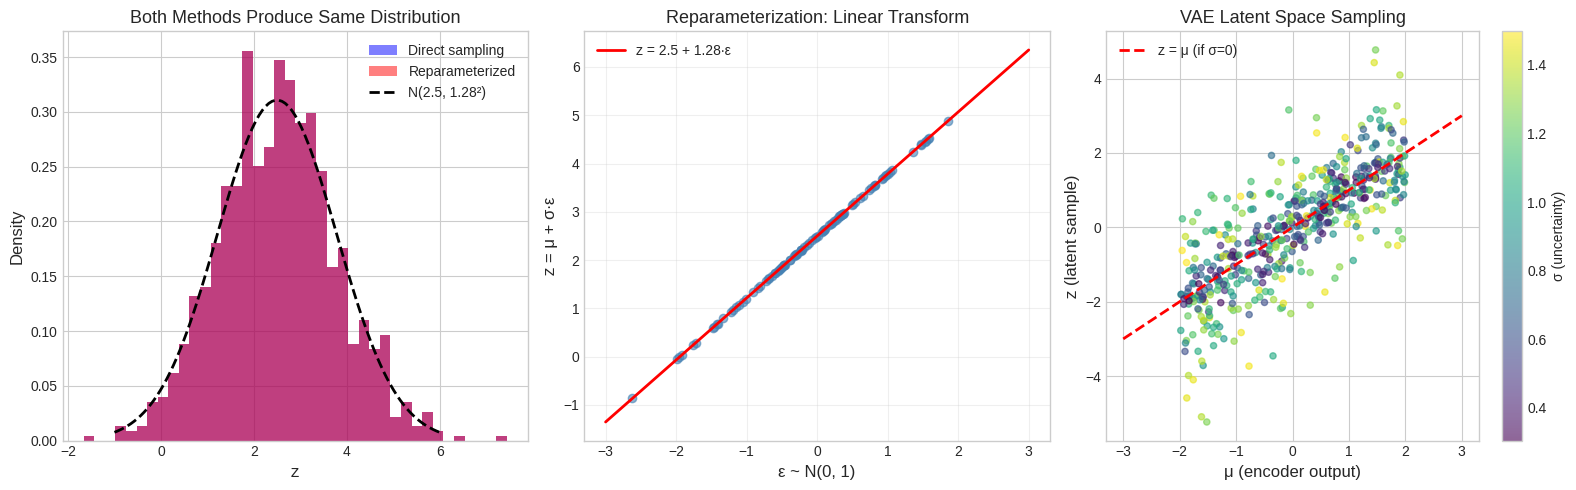


→ Reparameterization separates randomness (ε) from learnable params (μ, σ)
→ Gradients flow through μ and σ, enabling end-to-end training of VAEs!


In [ ]:
# ============================================================
# THE REPARAMETERIZATION TRICK
# ============================================================

print("=" * 60)
print("THE REPARAMETERIZATION TRICK (VAE)")
print("=" * 60)

# Encoder outputs
mu = 2.5      # Predicted mean
log_var = 0.5  # Predicted log-variance (for numerical stability)
sigma = np.exp(0.5 * log_var)  # Standard deviation

print(f"\nEncoder outputs:")
print(f"  μ (mean) = {mu}")
print(f"  log(σ²) = {log_var}")
print(f"  σ (std) = {sigma:.4f}")

# Method 1: Direct sampling (NON-differentiable)
np.random.seed(42)
z_direct = np.random.normal(mu, sigma, 1000)

# Method 2: Reparameterization (DIFFERENTIABLE through μ and σ)
np.random.seed(42)
epsilon = np.random.normal(0, 1, 1000)  # Fixed noise
z_reparam = mu + sigma * epsilon  # Linear transformation

print(f"\nBoth methods produce the same distribution:")
print(f"  Direct: mean = {np.mean(z_direct):.4f}, std = {np.std(z_direct):.4f}")
print(f"  Reparam: mean = {np.mean(z_reparam):.4f}, std = {np.std(z_reparam):.4f}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Direct vs Reparameterized comparison
ax1 = axes[0]
ax1.hist(z_direct, bins=40, alpha=0.5, label='Direct sampling', color='blue', density=True)
ax1.hist(z_reparam, bins=40, alpha=0.5, label='Reparameterized', color='red', density=True)
x = np.linspace(-1, 6, 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'k--', linewidth=2, label=f'N({mu}, {sigma:.2f}²)')
ax1.set_xlabel('z', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('Both Methods Produce Same Distribution', fontsize=13)
ax1.legend()

# Show the transformation
ax2 = axes[1]
ax2.scatter(epsilon[:100], z_reparam[:100], alpha=0.6, c='steelblue')
ax2.plot([-3, 3], [mu - 3*sigma, mu + 3*sigma], 'r-', linewidth=2,
         label=f'z = {mu} + {sigma:.2f}·ε')
ax2.set_xlabel('ε ~ N(0, 1)', fontsize=12)
ax2.set_ylabel('z = μ + σ·ε', fontsize=12)
ax2.set_title('Reparameterization: Linear Transform', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

# VAE latent space visualization
ax3 = axes[2]

# Simulate different (μ, σ) pairs from encoder
n_points = 500
mus = np.random.uniform(-2, 2, n_points)
sigmas = np.random.uniform(0.3, 1.5, n_points)

# For each, sample one z using reparameterization
epsilons = np.random.normal(0, 1, n_points)
zs = mus + sigmas * epsilons

scatter = ax3.scatter(mus, zs, c=sigmas, cmap='viridis', alpha=0.6, s=20)
ax3.plot([-3, 3], [-3, 3], 'r--', linewidth=2, label='z = μ (if σ=0)')
ax3.set_xlabel('μ (encoder output)', fontsize=12)
ax3.set_ylabel('z (latent sample)', fontsize=12)
ax3.set_title('VAE Latent Space Sampling', fontsize=13)
ax3.legend()
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('σ (uncertainty)')

plt.tight_layout()
plt.show()

print("\n→ Reparameterization separates randomness (ε) from learnable params (μ, σ)")
print("→ Gradients flow through μ and σ, enabling end-to-end training of VAEs!")

---

# Part 9: Practical Exercises and Summary

## Probability Cheat Sheet for Deep Learning

| Concept | Formula | Deep Learning Application |
|---------|---------|---------------------------|
| **Probability** | $P(A) \in [0, 1]$ | Softmax outputs, classification |
| **Bayes' Theorem** | $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$ | Bayesian networks, uncertainty |
| **Expected Value** | $E[X] = \sum_x x P(x)$ | Loss functions, risk minimization |
| **Variance** | $\text{Var}(X) = E[(X-\mu)^2]$ | Model uncertainty, noise |
| **Gaussian** | $\mathcal{N}(\mu, \sigma^2)$ | Weight init, noise, VAE |
| **Bernoulli** | $\text{Ber}(p)$ | Dropout, binary classification |
| **Entropy** | $H(X) = -\sum P \log P$ | Information content, regularization |
| **Cross-Entropy** | $H(P,Q) = -\sum P \log Q$ | Classification loss |
| **KL Divergence** | $D_{KL}(P\|Q) = \sum P \log \frac{P}{Q}$ | VAE, knowledge distillation |
| **MLE** | $\arg\max_\theta P(\mathcal{D}|\theta)$ | Training = maximizing likelihood |

---

## Exercise 1: Implement Softmax from Scratch

Softmax converts logits to probabilities. Implement it with numerical stability!

In [ ]:
# ============================================================
# EXERCISE 1: Implement Softmax
# ============================================================

def softmax_naive(logits):
    """Naive softmax - may cause overflow!"""
    exp_logits = np.exp(logits)
    return exp_logits / np.sum(exp_logits)

def softmax_stable(logits):
    """Numerically stable softmax"""
    # Subtract max for numerical stability
    shifted = logits - np.max(logits)
    exp_logits = np.exp(shifted)
    return exp_logits / np.sum(exp_logits)

# Test with normal values
logits_normal = np.array([2.0, 1.0, 0.1])
print("Normal logits:", logits_normal)
print("Softmax output:", softmax_stable(logits_normal))
print("Sum:", np.sum(softmax_stable(logits_normal)))

# Test with large values (would overflow with naive implementation)
logits_large = np.array([1000.0, 1001.0, 1002.0])
print("\nLarge logits:", logits_large)
print("Stable softmax:", softmax_stable(logits_large))

# Compare naive vs stable
print("\nDemonstrating the problem:")
try:
    print("Naive with large values:", softmax_naive(logits_large))
except:
    print("Naive FAILS with overflow!")
print("Stable with large values:", softmax_stable(logits_large))

Normal logits: [2.  1.  0.1]
Softmax output: [0.65900114 0.24243297 0.09856589]
Sum: 1.0

Large logits: [1000. 1001. 1002.]
Stable softmax: [0.09003057 0.24472847 0.66524096]

Demonstrating the problem:
Naive with large values: [nan nan nan]
Stable with large values: [0.09003057 0.24472847 0.66524096]


## Exercise 2: Implement Cross-Entropy Loss

Cross-entropy is THE classification loss. Implement it with label smoothing!

True label (one-hot): [1 0 0 0]
Predicted probs: [0.9  0.05 0.03 0.02]

Standard CE Loss: 0.1054
CE with smoothing=0.1: 0.3578
CE with smoothing=0.2: 0.6103


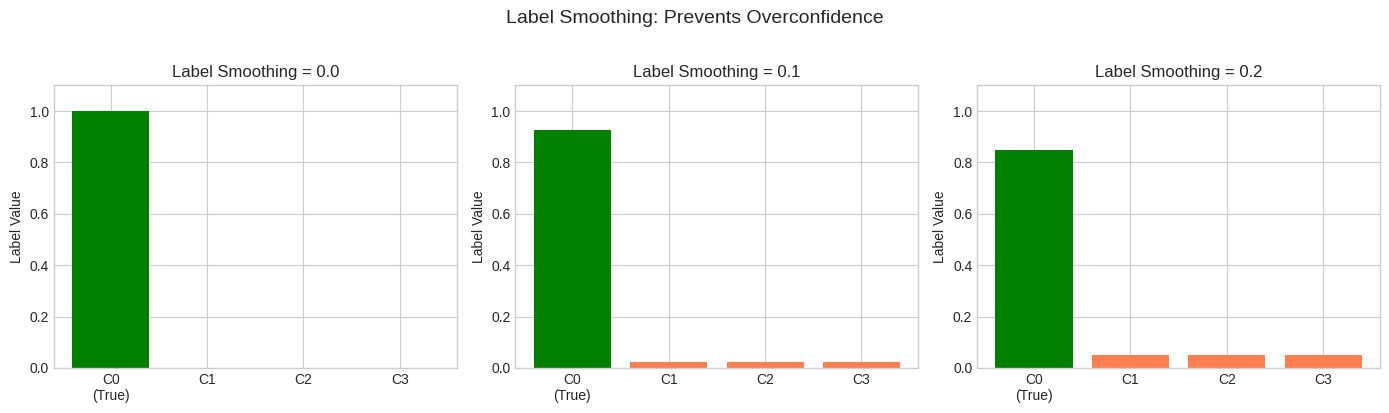


→ Label smoothing prevents the model from becoming overconfident
→ It acts as a regularizer, improving generalization


In [ ]:
# ============================================================
# EXERCISE 2: Cross-Entropy with Label Smoothing
# ============================================================

def cross_entropy_loss(y_true, y_pred, epsilon=1e-15):
    """Standard cross-entropy loss"""
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

def cross_entropy_with_smoothing(y_true, y_pred, smoothing=0.1, epsilon=1e-15):
    """Cross-entropy with label smoothing for regularization"""
    n_classes = len(y_true)
    # Smooth labels: (1 - smoothing) for true class, smoothing/(n-1) for others
    y_smooth = y_true * (1 - smoothing) + smoothing / n_classes
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_smooth * np.log(y_pred))

# Example
y_true = np.array([1, 0, 0, 0])  # One-hot: class 0
y_pred = np.array([0.9, 0.05, 0.03, 0.02])

print("True label (one-hot):", y_true)
print("Predicted probs:", y_pred)
print(f"\nStandard CE Loss: {cross_entropy_loss(y_true, y_pred):.4f}")
print(f"CE with smoothing=0.1: {cross_entropy_with_smoothing(y_true, y_pred, 0.1):.4f}")
print(f"CE with smoothing=0.2: {cross_entropy_with_smoothing(y_true, y_pred, 0.2):.4f}")

# Visualize label smoothing
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

smoothing_values = [0.0, 0.1, 0.2]
for ax, smooth in zip(axes, smoothing_values):
    n_classes = 4
    if smooth == 0:
        labels = y_true
    else:
        labels = y_true * (1 - smooth) + smooth / n_classes

    ax.bar(['C0\n(True)', 'C1', 'C2', 'C3'], labels, color=['green', 'coral', 'coral', 'coral'])
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Label Value')
    ax.set_title(f'Label Smoothing = {smooth}')

plt.suptitle('Label Smoothing: Prevents Overconfidence', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

print("\n→ Label smoothing prevents the model from becoming overconfident")
print("→ It acts as a regularizer, improving generalization")

## Exercise 3: Implement Dropout Layer

Dropout is Bernoulli sampling applied to neural network training!

In [ ]:
# ============================================================
# EXERCISE 3: Implement Dropout
# ============================================================

class Dropout:
    """Dropout layer using Bernoulli sampling"""

    def __init__(self, p=0.5):
        """
        Args:
            p: Probability of DROPPING a neuron (not keeping!)
        """
        self.p = p
        self.mask = None
        self.training = True

    def forward(self, x):
        if self.training:
            # Sample Bernoulli mask: 1 with prob (1-p), 0 with prob p
            self.mask = np.random.binomial(1, 1 - self.p, x.shape)
            # Apply mask and scale by 1/(1-p) to maintain expected value
            return x * self.mask / (1 - self.p)
        else:
            # At test time, use full activations (no scaling needed)
            return x

    def set_training(self, mode):
        self.training = mode

# Test dropout
np.random.seed(42)
x = np.array([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]])

dropout = Dropout(p=0.3)

print("Input:", x)
print(f"\nDropout rate: {dropout.p}")

# Training mode
print("\n--- TRAINING MODE ---")
for i in range(3):
    np.random.seed(i)
    out = dropout.forward(x)
    print(f"Trial {i+1}: {out.round(2)}")
    print(f"  Mask: {dropout.mask}")

# Test mode
print("\n--- TEST MODE ---")
dropout.set_training(False)
out = dropout.forward(x)
print(f"Output: {out}")
print("\n→ Training: Randomly drops neurons and scales up survivors")
print("→ Testing: Uses full network without dropout")

Input: [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]

Dropout rate: 0.3

--- TRAINING MODE ---
Trial 1: [[ 1.43  0.    4.29  5.71  7.14  8.57 10.    0.    0.   14.29]]
  Mask: [[1 0 1 1 1 1 1 0 0 1]]
Trial 2: [[ 1.43  0.    4.29  5.71  7.14  8.57 10.   11.43 12.86 14.29]]
  Mask: [[1 0 1 1 1 1 1 1 1 1]]
Trial 3: [[ 1.43  2.86  4.29  5.71  7.14  8.57 10.   11.43 12.86 14.29]]
  Mask: [[1 1 1 1 1 1 1 1 1 1]]

--- TEST MODE ---
Output: [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]

→ Training: Randomly drops neurons and scales up survivors
→ Testing: Uses full network without dropout


---

## Summary: The Probabilistic View of Deep Learning

### Training as Maximum Likelihood
```
Minimize Cross-Entropy Loss = Maximize Log-Likelihood
                           = Find most probable model parameters given data
```

### Key Probability Concepts in Deep Learning

1. **Softmax Output** = Probability distribution over classes
2. **Cross-Entropy Loss** = Negative log-likelihood of correct class
3. **Weight Initialization** = Sampling from Gaussian distributions
4. **Dropout** = Bernoulli sampling to prevent overfitting
5. **Mini-batch SGD** = Monte Carlo gradient estimation
6. **VAE Latent Space** = Gaussian distributions with reparameterization
7. **KL Divergence** = Regularizing latent distributions toward prior

### The Big Picture

$$\boxed{\text{Deep Learning} = \text{Probabilistic Modeling} + \text{Gradient Descent}}$$

---

## Congratulations!

You now have a solid foundation in **probability for deep learning**!

### What's Next?
- **Bayesian Deep Learning**: Uncertainty quantification
- **Variational Inference**: Approximate posterior distributions  
- **Generative Models**: VAEs, Diffusion Models, Normalizing Flows
- **Reinforcement Learning**: Policy gradients, entropy regularization

---

*Created for the Introduction to Deep Neural Networks course*